<a href="https://colab.research.google.com/github/12325290/java-programming/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly umap-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import umap
from sklearn.manifold import TSNE


df = pd.read_csv('/content/sentimentdataset  int 317.csv')

df.head()



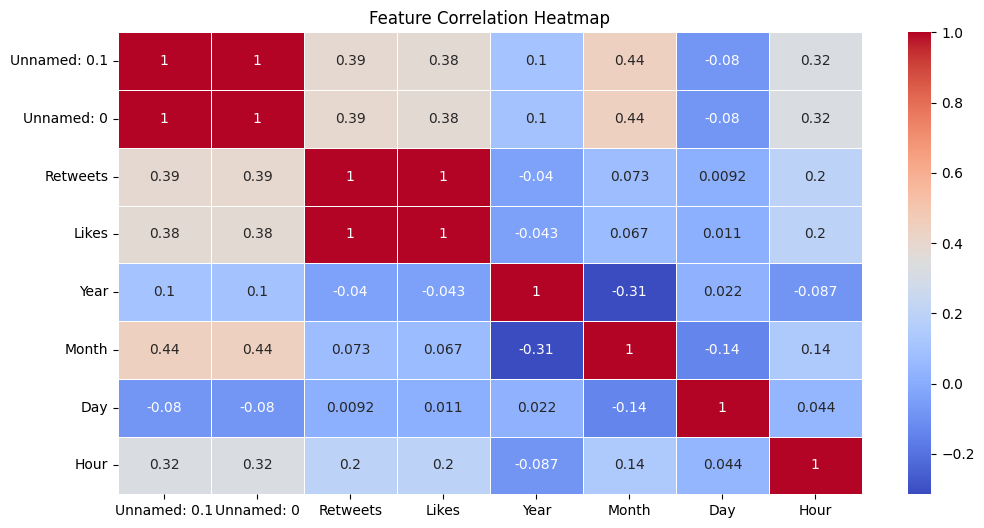

In [ ]:
plt.figure(figsize=(12,6))

numeric_df = df.select_dtypes(include=['number'])

if not numeric_df.empty:
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Feature Correlation Heatmap')
    plt.show()
else:
    print("No numeric columns found for correlation heatmap.")


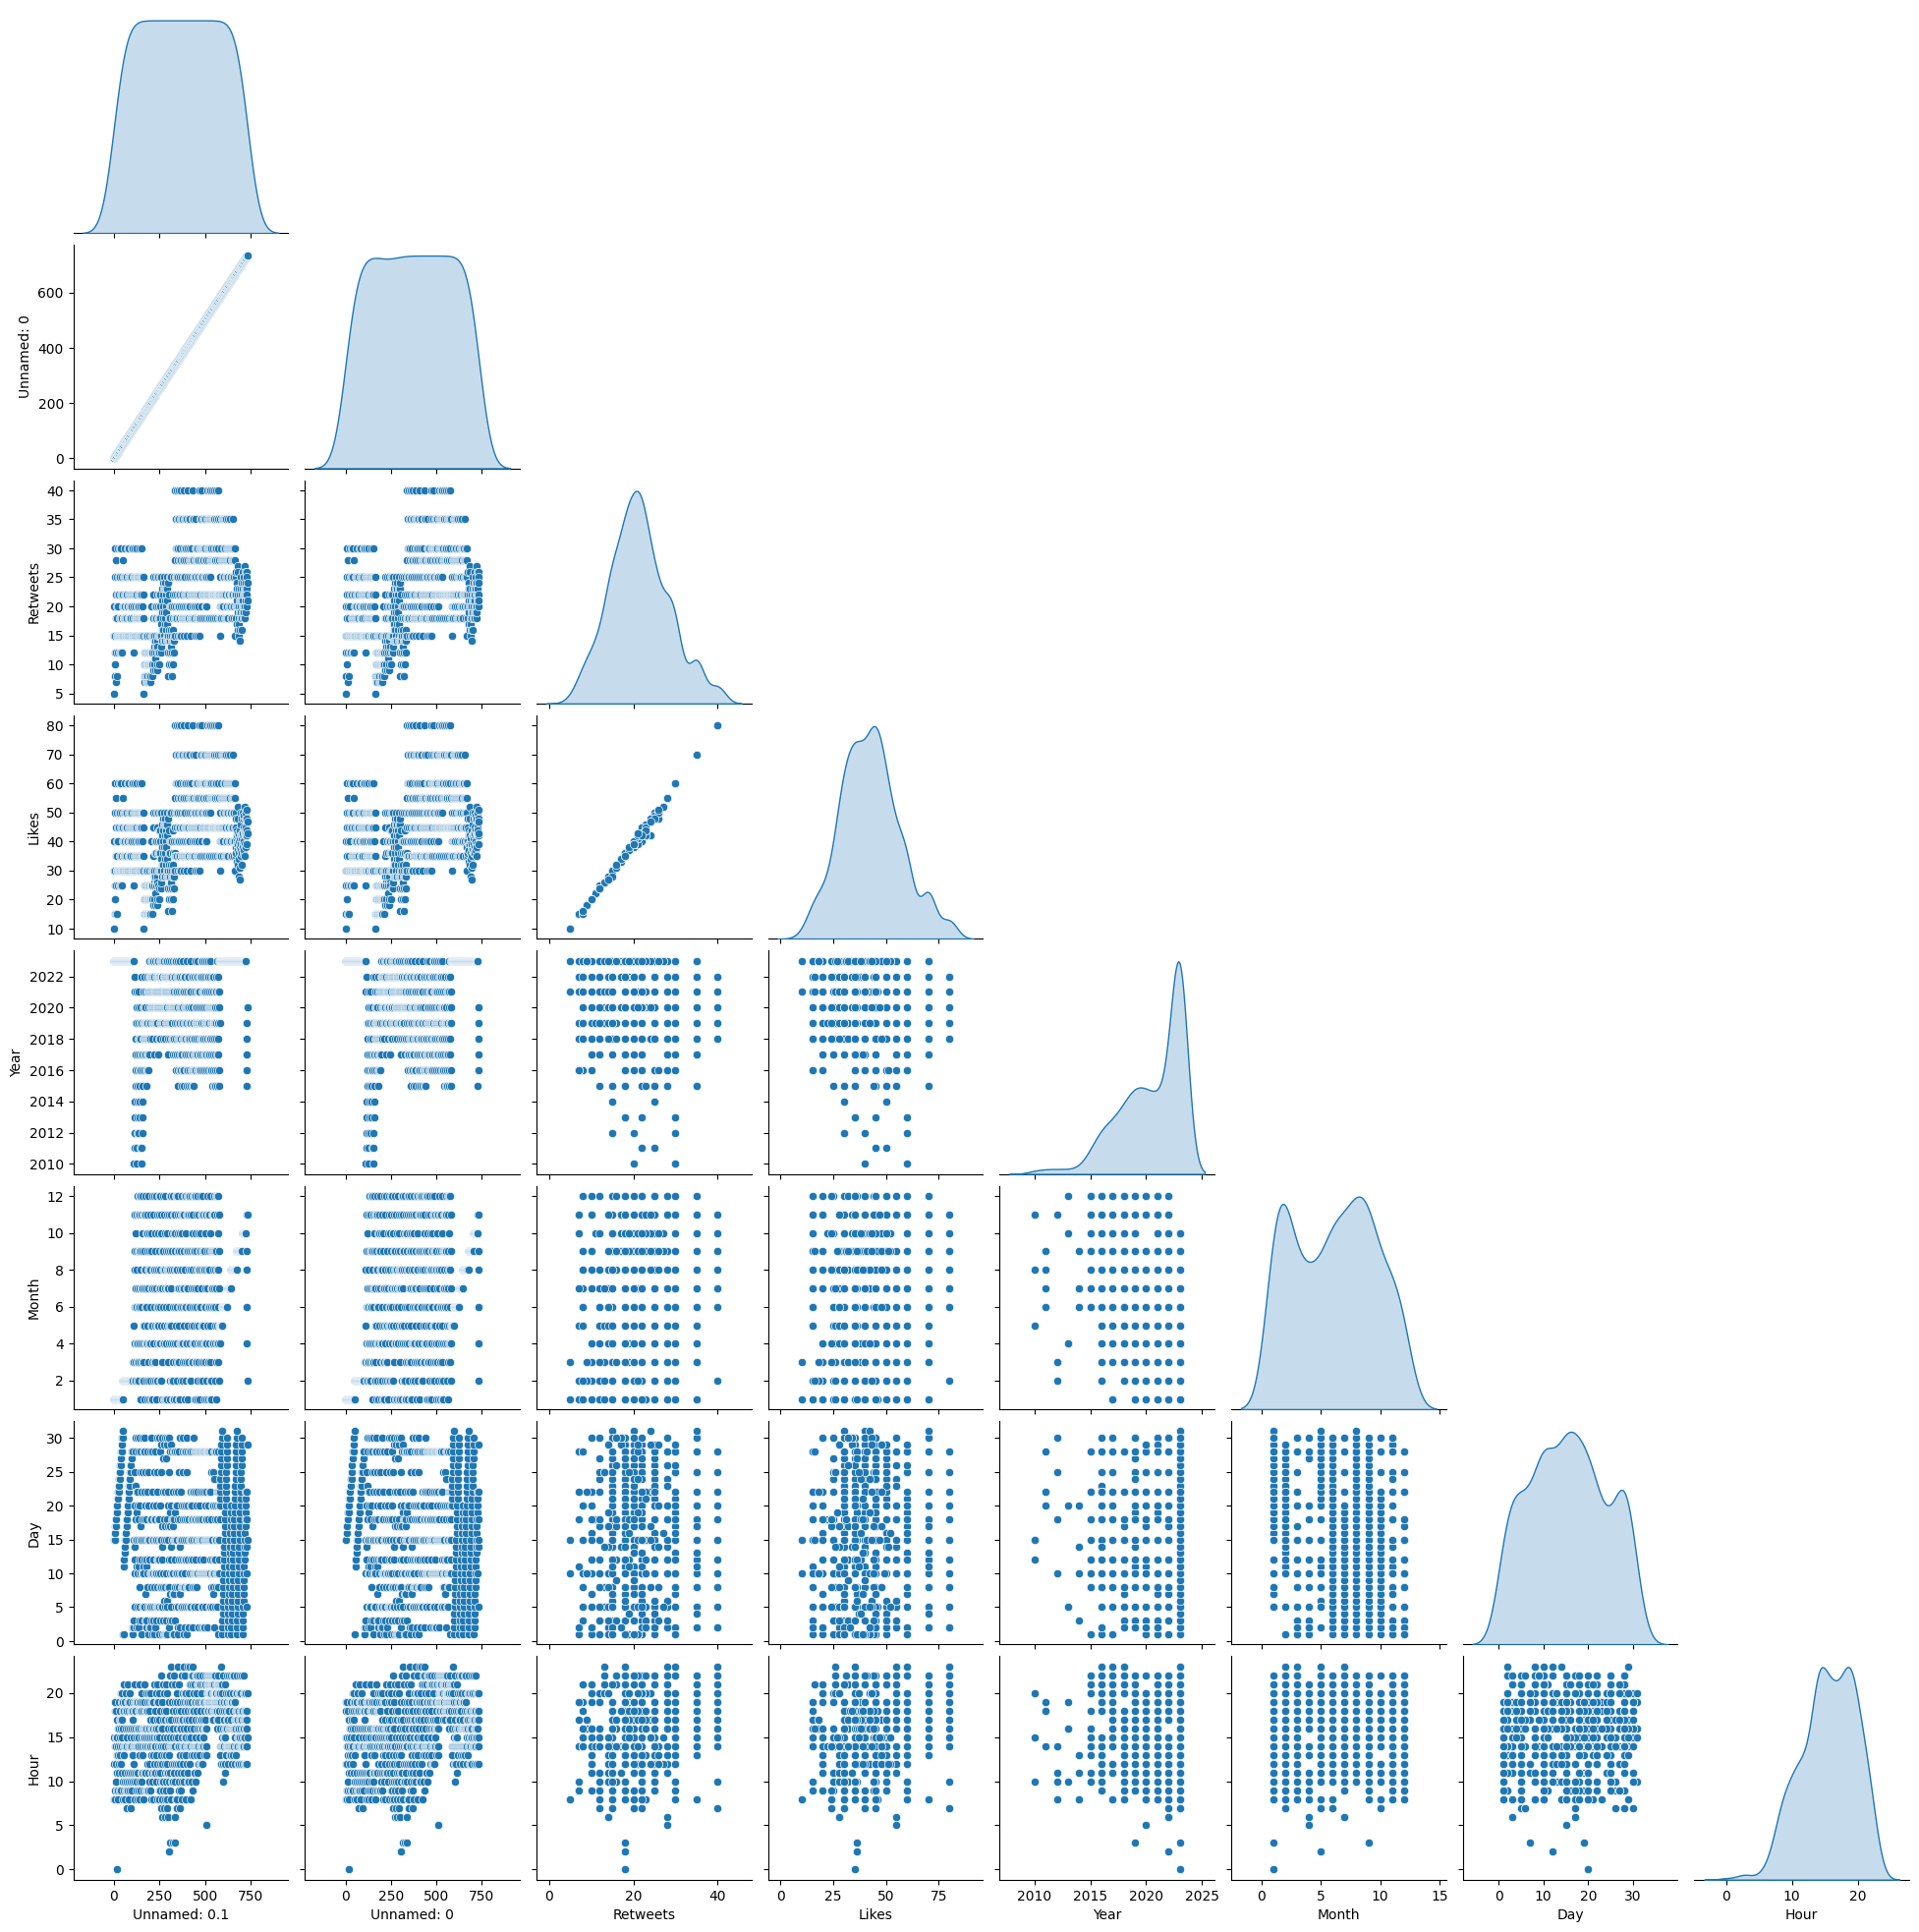

In [ ]:
sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()


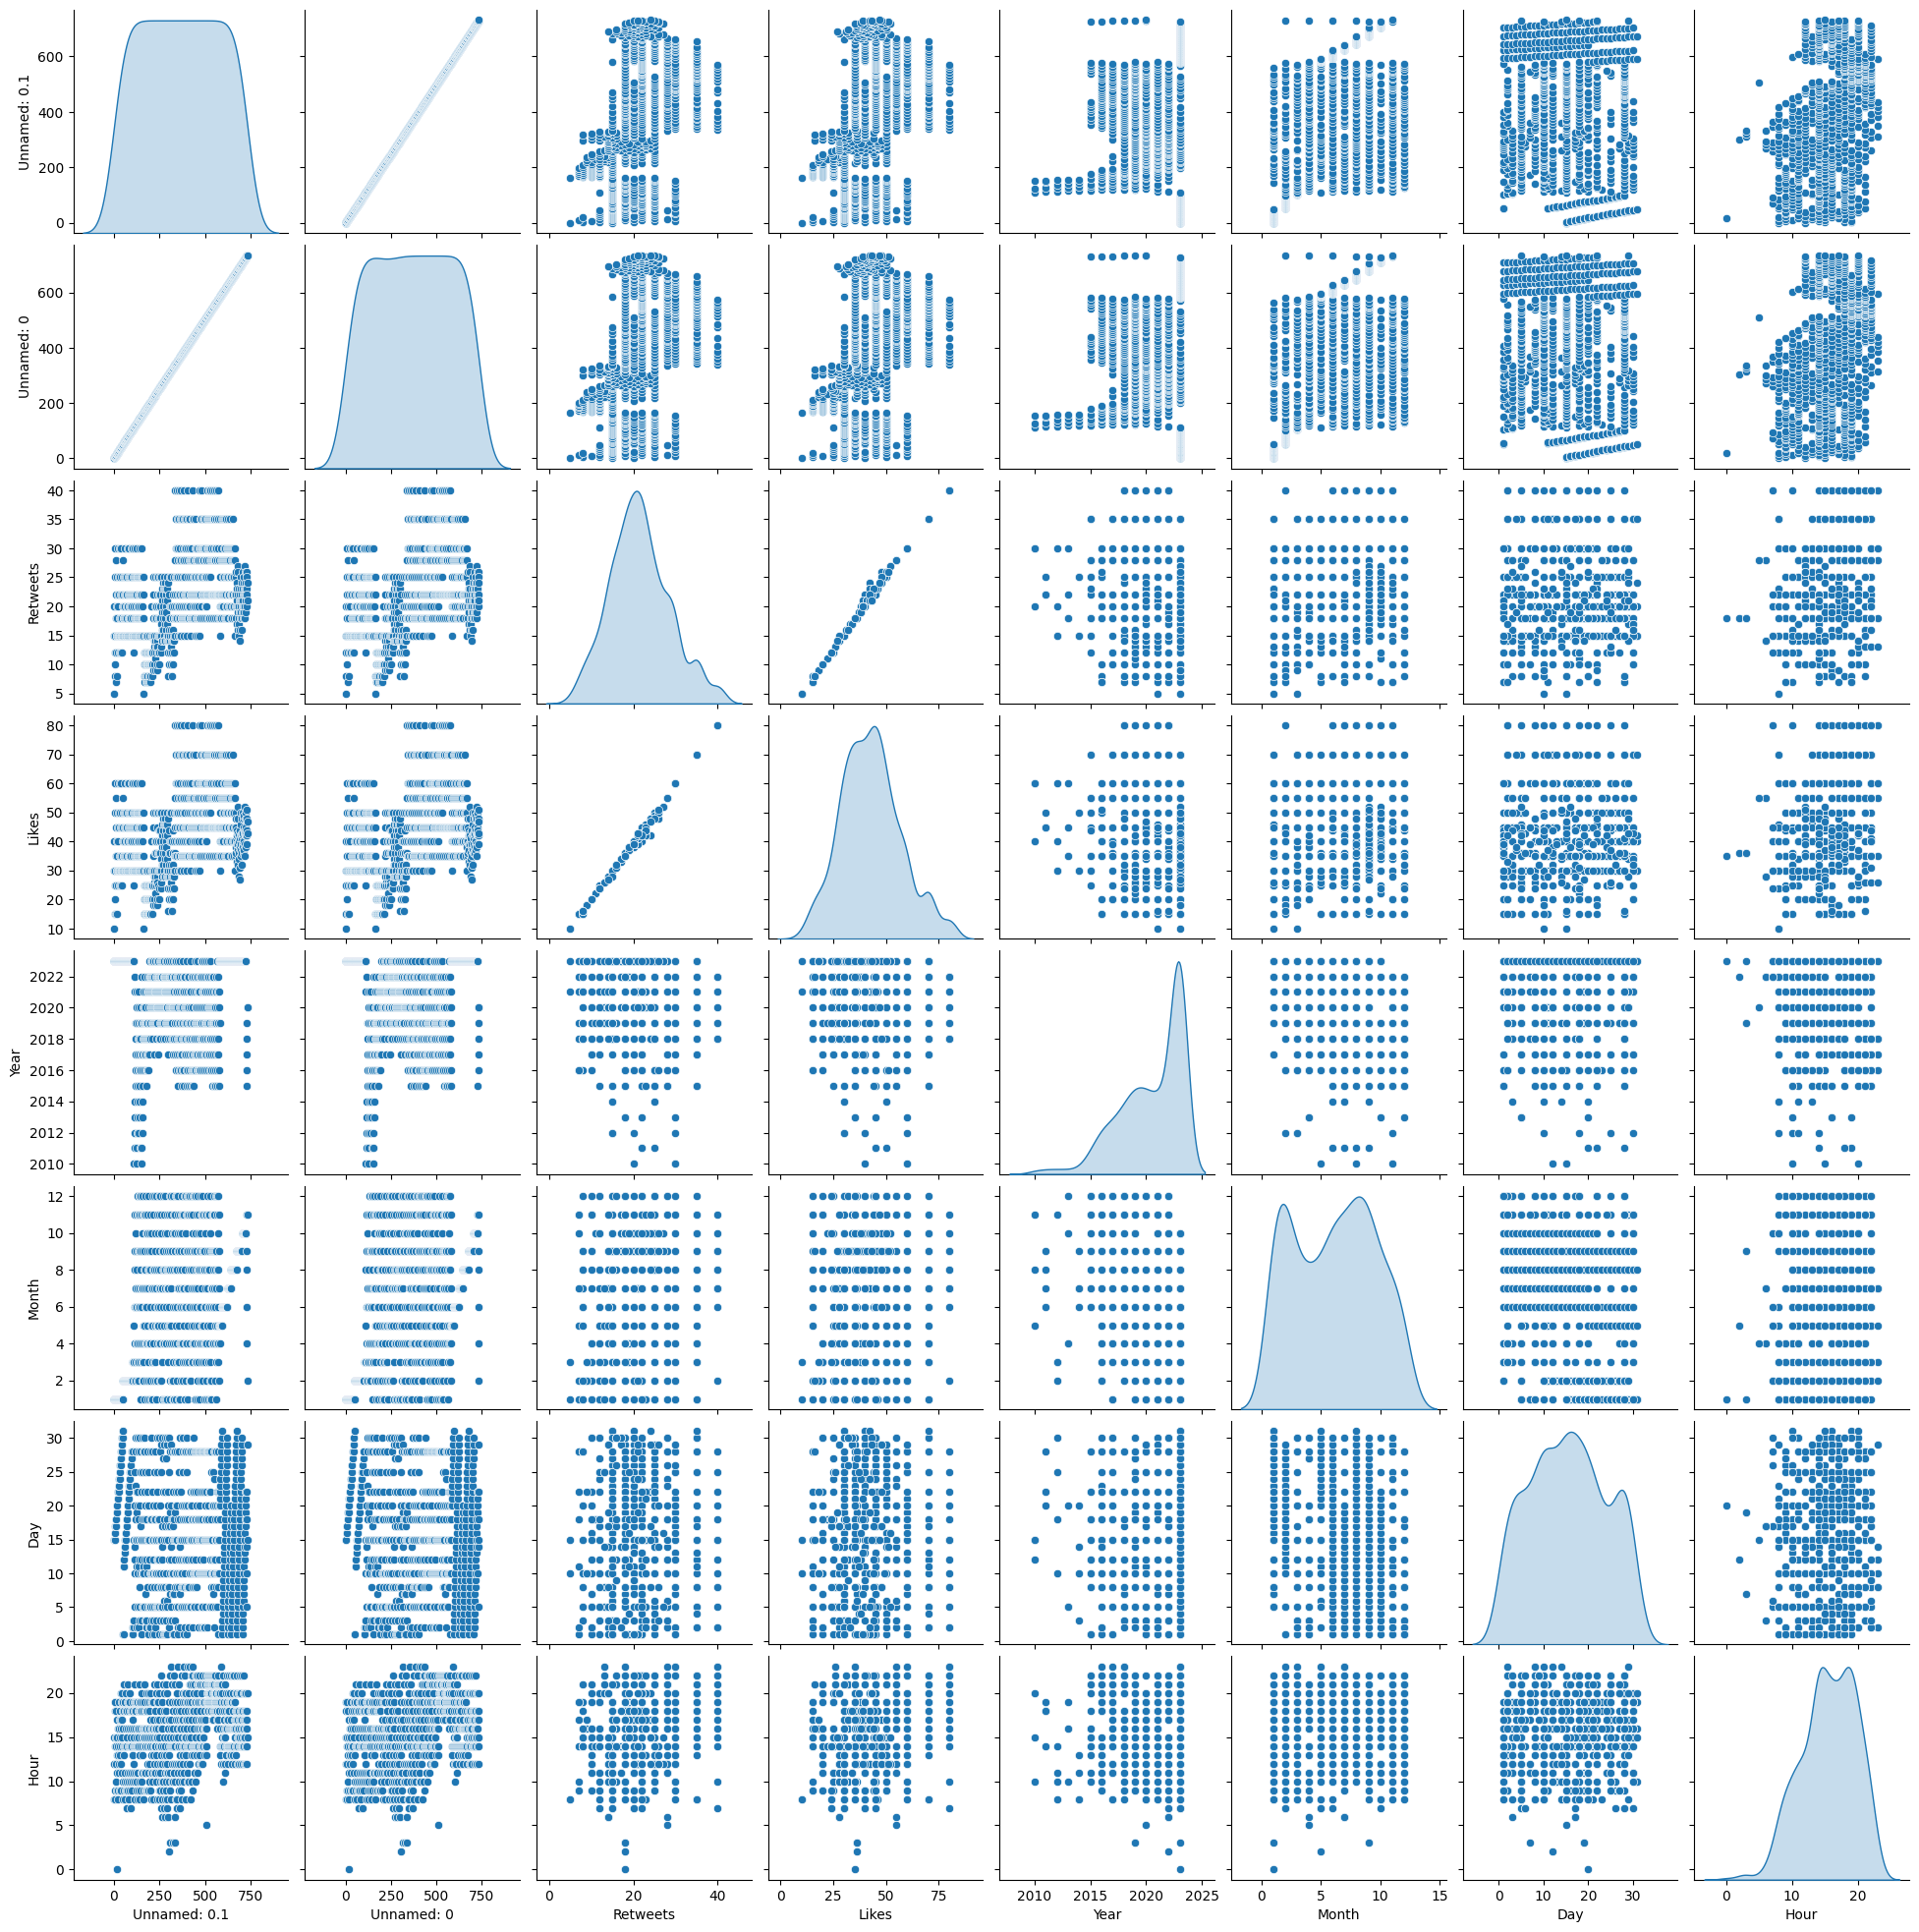

In [ ]:
sns.pairplot(df, diag_kind='kde')  # Change 'target_column' if needed
plt.show()


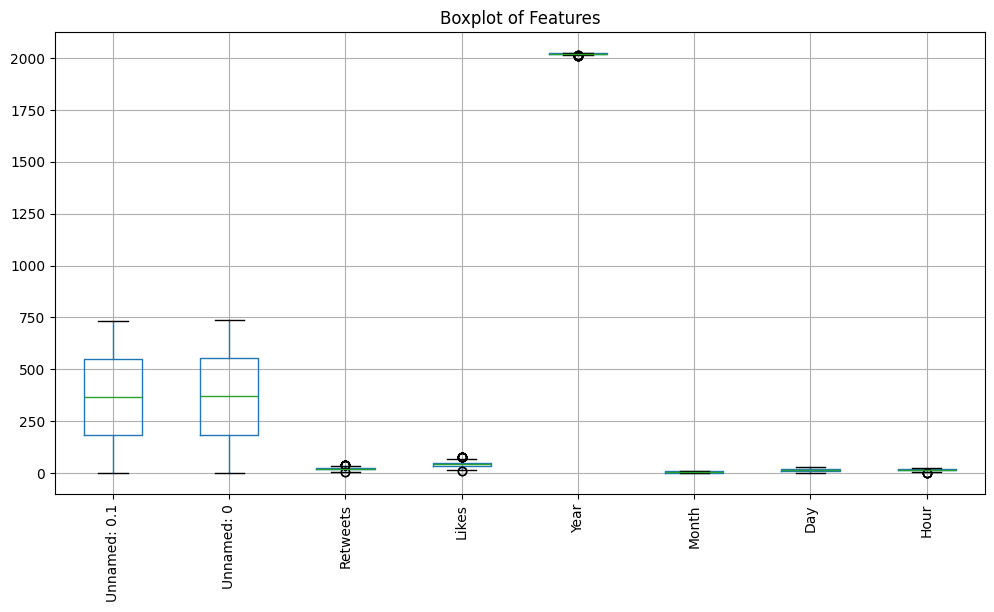

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot(rot=90)
plt.title("Boxplot of Features")
plt.show()


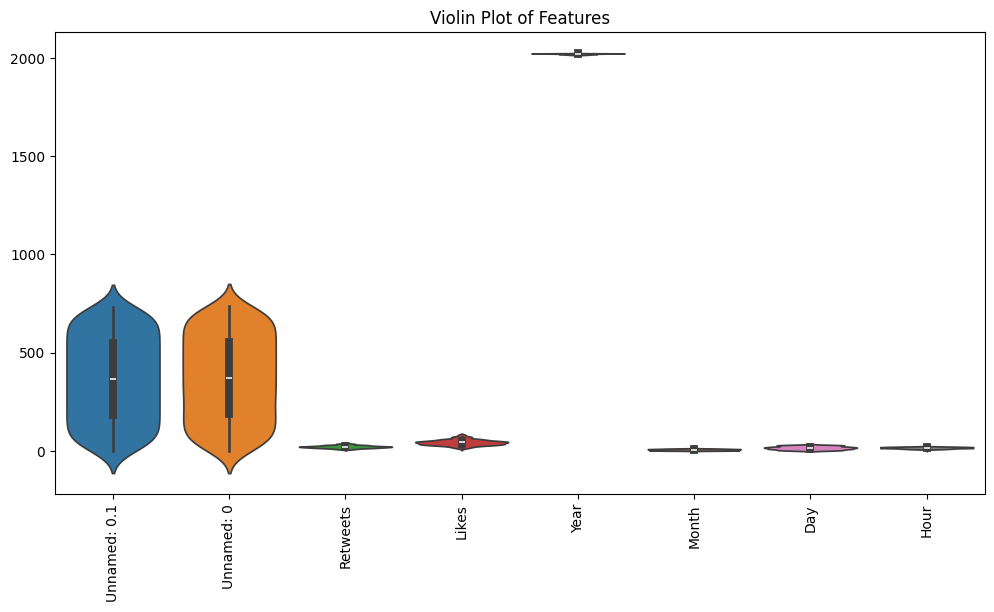

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df)
plt.xticks(rotation=90)
plt.title("Violin Plot of Features")
plt.show()


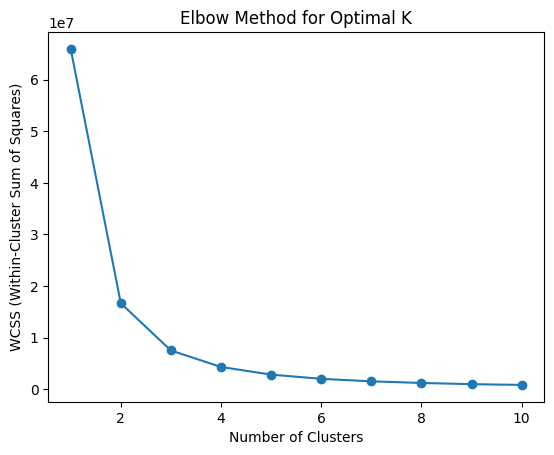

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df.select_dtypes(include=np.number))  # Only numeric columns
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
n_clusters = 3  # Choose based on Elbow Plot
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(df.select_dtypes(include=np.number))

silhouette_avg = silhouette_score(df.select_dtypes(include=np.number), labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')


Silhouette Score: 0.577


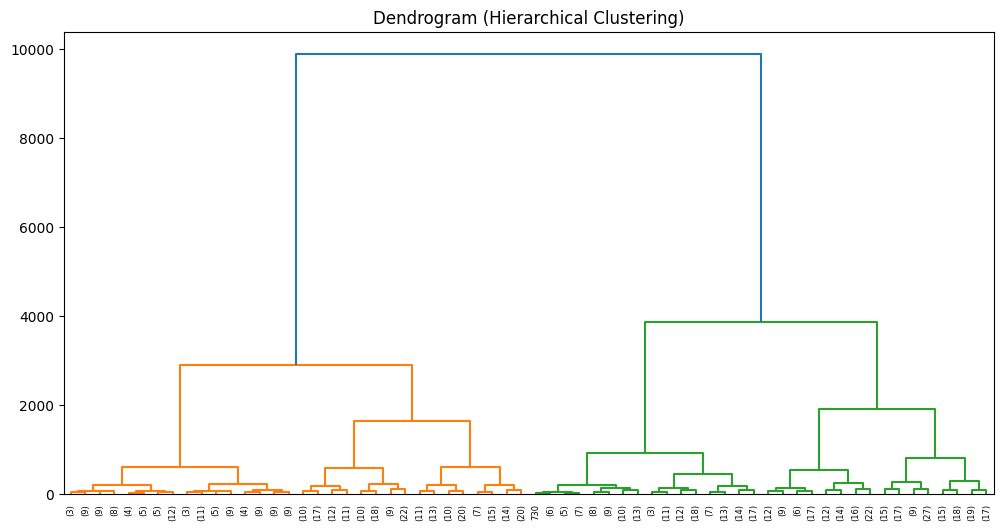

In [ ]:
plt.figure(figsize=(12,6))
linked = linkage(df.select_dtypes(include=np.number), method='ward')
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.show()


In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.select_dtypes(include=np.number))

fig = px.scatter_3d(x=pca_result[:,0], y=pca_result[:,1], z=pca_result[:,2],
                     color=labels, title='3D PCA Scatter Plot')
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

numeric_df = df.select_dtypes(include=['number'])

if numeric_df.shape[1] < 5:
    print("Error: Not enough numeric features to create the spider chart.")
else:
    categories = numeric_df.columns[:5]
    values = numeric_df.mean().values[:5]

    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories,
        fill='toself'
    ))
    fig.update_layout(title="Feature Comparison (Spider Chart)")
    fig.show()


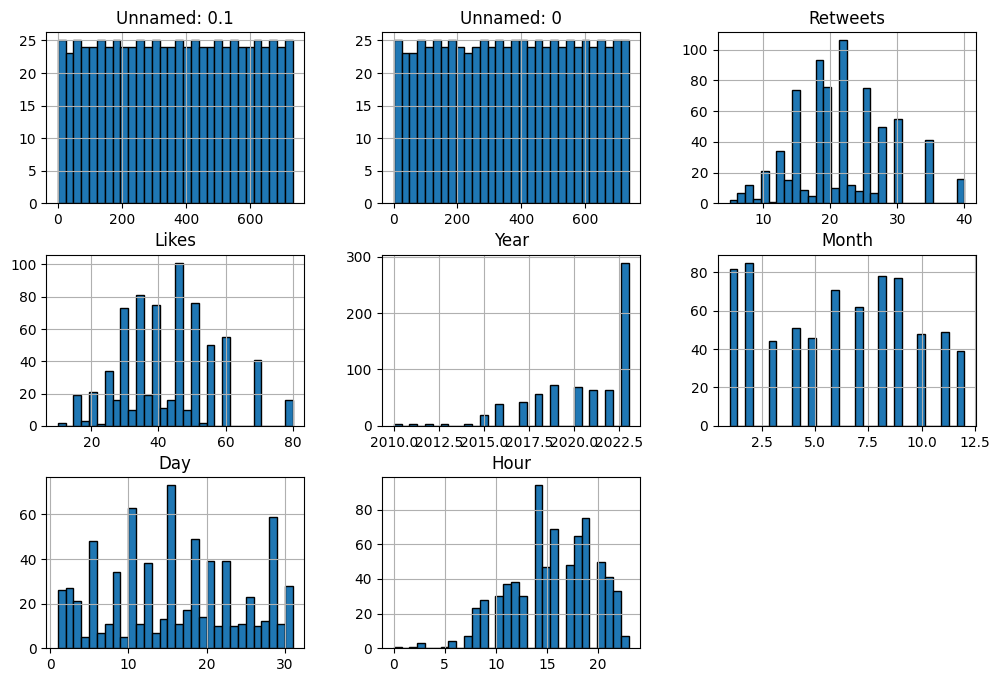

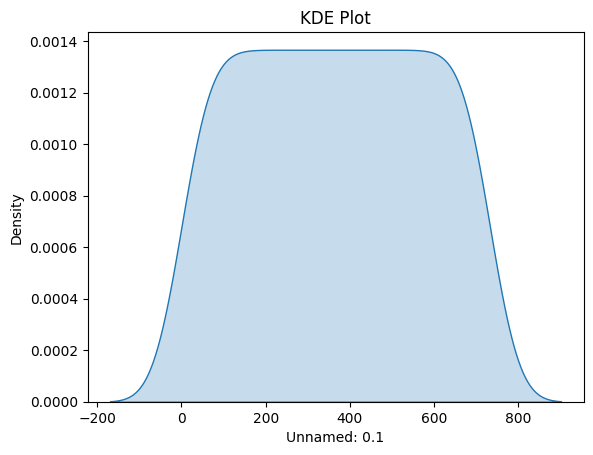

In [ ]:
df.hist(figsize=(12,8), bins=30, edgecolor='black')
plt.show()

sns.kdeplot(df.iloc[:, 0], fill=True)
plt.title("KDE Plot")
plt.show()


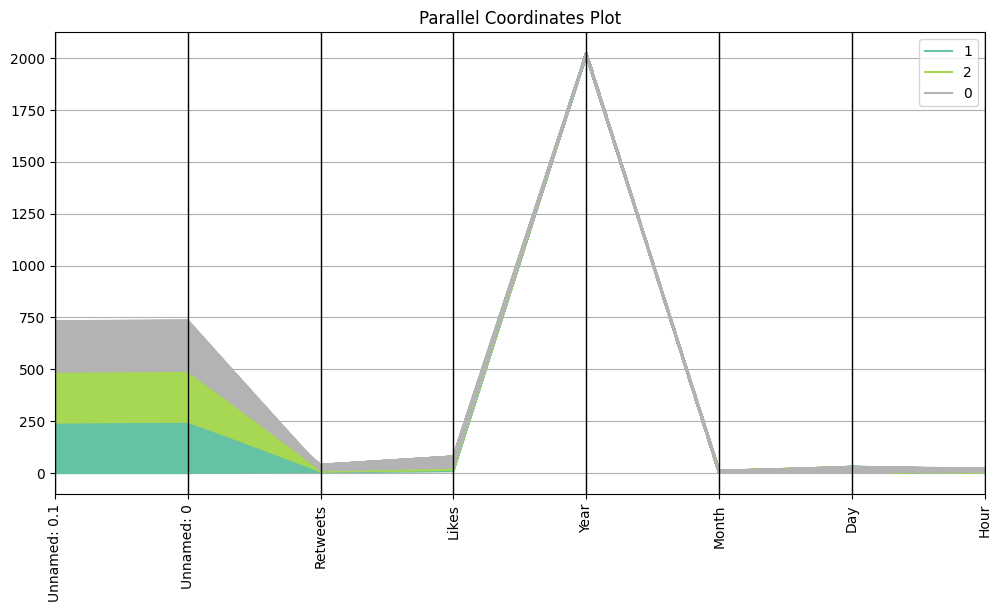

In [ ]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

df['Cluster'] = labels

numeric_df = df.select_dtypes(include=['number'])
numeric_df['Cluster'] = labels

plt.figure(figsize=(12, 6))
parallel_coordinates(numeric_df, class_column='Cluster', colormap=plt.get_cmap("Set2"))
plt.xticks(rotation=90)
plt.title("Parallel Coordinates Plot")
plt.show()


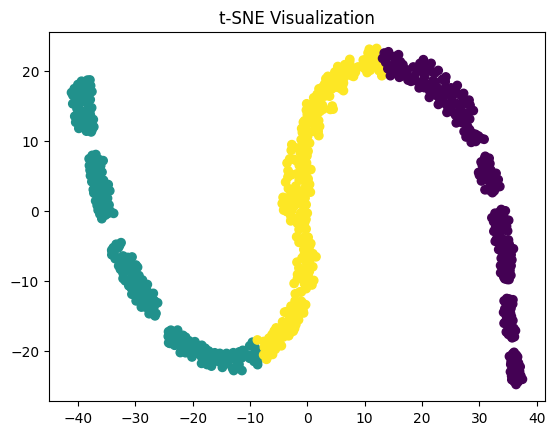

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



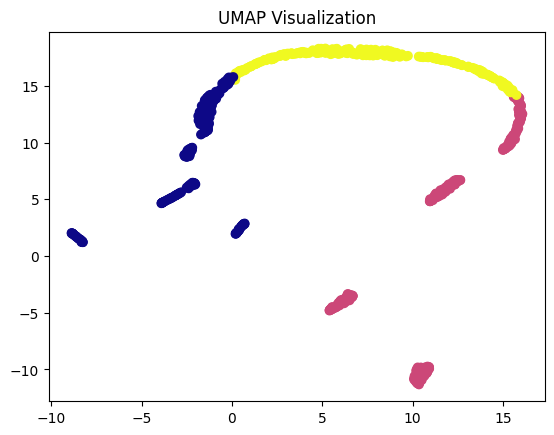

In [ ]:

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df.select_dtypes(include=np.number))
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=labels, cmap='viridis')
plt.title("t-SNE Visualization")
plt.show()

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1)
umap_result = reducer.fit_transform(df.select_dtypes(include=np.number))
plt.scatter(umap_result[:,0], umap_result[:,1], c=labels, cmap='plasma')
plt.title("UMAP Visualization")
plt.show()



In [ ]:
fig = px.scatter(df, x=df.columns[0], y=df.columns[1], color=labels, title="Interactive Scatter Plot")
fig.show()


In [ ]:
# Water Treatment Plant Data Analysis using Unsupervised Machine Learning
# ======================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from sklearn.manifold import TSNE
import umap


warnings.filterwarnings('ignore')


plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')


data = pd.read_excel('/content/Water_Treatment_Digital_Twin_Dataset.xlsx')


print("Dataset Information:")
print(f"Shape: {data.shape}")
data.info()
print("\nFirst 5 rows:")
display(data.head())

data['Timestamp'] = pd.to_datetime(data['Timestamp'])


data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month


print("\nMissing values:")
print(data.isnull().sum())


print("\nStatistical Summary:")
display(data.describe())


numerical_cols = ['pH', 'Turbidity (NTU)', 'Chlorine_Level (mg/L)',
                 'Flow_Rate (L/s)', 'Model_Accuracy', 'Hour']


plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.savefig('histograms.png')
plt.close()


plt.figure(figsize=(15, 12))
sns.pairplot(data[numerical_cols], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.suptitle('Pair Plot of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.savefig('pairplot.png')
plt.close()


plt.figure(figsize=(12, 10))
correlation = data[numerical_cols].corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.close()


plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols[:4]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Plant_ID', y=col, data=data)
    plt.title(f'Box Plot of {col} by Plant')
    plt.tight_layout()
plt.savefig('boxplots_by_plant.png')
plt.close()


plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols[:4]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='Plant_ID', y=col, data=data)
    plt.title(f'Violin Plot of {col} by Plant')
    plt.tight_layout()
plt.savefig('violinplots_by_plant.png')
plt.close()


features = ['pH', 'Turbidity (NTU)', 'Chlorine_Level (mg/L)',
           'Flow_Rate (L/s)', 'Model_Accuracy']


X = data[features].copy()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.8, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% explained variance threshold')
plt.xlabel('Principal Components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('pca_explained_variance.png')
plt.close()


n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


if X_pca.shape[1] >= 3:
    fig = px.scatter_3d(
        data_frame=data,
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        z=X_pca[:, 2],
        color='Plant_ID',
        hover_data=['Sensor_ID', 'pH', 'Turbidity (NTU)', 'Chlorine_Level (mg/L)'],
        title='3D PCA Visualization of Water Treatment Data',
        labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3'}
    )
    fig.update_layout(legend_title_text='Plant ID')
    fig.write_html('pca_3d.html')


inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


    if n_clusters > 1:
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X_scaled, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('kmeans_optimization.png')
plt.close()


optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on silhouette score: {optimal_clusters}")


kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_,
                     cmap='viridis', s=100, alpha=0.8, edgecolor='k')
plt.colorbar(scatter, label='Cluster')
plt.title(f'K-means Clustering (k={optimal_clusters}) Visualized in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('kmeans_clusters_pca.png')
plt.close()


fig = px.scatter(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    color=kmeans.labels_,
    hover_data=[data['Plant_ID'], data['Sensor_ID'], data['pH'], data['Turbidity (NTU)'],
                data['Chlorine_Level (mg/L)'], data['Flow_Rate (L/s)']],
    title=f'K-means Clustering (k={optimal_clusters}) Visualized in PCA Space',
    labels={'x': 'PC1', 'y': 'PC2', 'color': 'Cluster'}
)
fig.update_layout(legend_title_text='Cluster')
fig.write_html('kmeans_clusters_interactive.html')


from sklearn.neighbors import NearestNeighbors


neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)


distances = np.sort(distances[:, 1])


plt.figure(figsize=(12, 8))
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN Epsilon Selection')
plt.xlabel('Data Points (sorted by distance)')
plt.ylabel('Distance to 2nd Nearest Neighbor')
plt.grid(True)
plt.tight_layout()
plt.savefig('dbscan_epsilon_selection.png')
plt.close()



dbscan = DBSCAN(eps=epsilon, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)
print(f"\nDBSCAN results:")
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")


plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan.labels_,
                     cmap='viridis', s=100, alpha=0.8, edgecolor='k')
plt.colorbar(scatter, label='Cluster')
plt.title('DBSCAN Clustering Visualized in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('dbscan_clusters_pca.png')
plt.close()

Z = linkage(X_scaled, method='ward')


plt.figure(figsize=(16, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp', p=12, leaf_font_size=10)
plt.axhline(y=5, color='r', linestyle='--', label='Cut-off for cluster formation')
plt.legend()
plt.tight_layout()
plt.savefig('hierarchical_dendrogram.png')
plt.close()


hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters)
data['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)


plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical.labels_,
                     cmap='viridis', s=100, alpha=0.8, edgecolor='k')
plt.colorbar(scatter, label='Cluster')
plt.title(f'Hierarchical Clustering (k={optimal_clusters}) Visualized in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('hierarchical_clusters_pca.png')
plt.close()



tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)


plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_,
                     cmap='viridis', s=100, alpha=0.8, edgecolor='k')
plt.colorbar(scatter, label='Cluster')
plt.title(f't-SNE Visualization with K-means Clusters (k={optimal_clusters})')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('tsne_kmeans_clusters.png')
plt.close()

# Apply UMAP
umap_reducer = umap.UMAP(random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans.labels_,
                     cmap='viridis', s=100, alpha=0.8, edgecolor='k')
plt.colorbar(scatter, label='Cluster')
plt.title(f'UMAP Visualization with K-means Clusters (k={optimal_clusters})')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('umap_kmeans_clusters.png')
plt.close()


plt.figure(figsize=(15, 10))

parallel_df = X.copy()
for col in parallel_df.columns:
    parallel_df[col] = (parallel_df[col] - parallel_df[col].min()) / (parallel_df[col].max() - parallel_df[col].min())

parallel_df['Cluster'] = kmeans.labels_


colors = plt.cm.viridis(np.linspace(0, 1, optimal_clusters))


for i in range(optimal_clusters):
    cluster_data = parallel_df[parallel_df['Cluster'] == i]
    pd.plotting.parallel_coordinates(cluster_data, 'Cluster', color=colors[i], alpha=0.5)

plt.title('Parallel Coordinates Plot of K-means Clusters')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('parallel_coordinates_clusters.png')
plt.close()


cluster_means = data.groupby('KMeans_Cluster')[features].mean()

fig = go.Figure()

for i in range(optimal_clusters):
    fig.add_trace(go.Scatterpolar(
        r=cluster_means.iloc[i].values,
        theta=features,
        fill='toself',
        name=f'Cluster {i}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
        )),
    showlegend=True,
    title='Radar Chart of Feature Importance by Cluster'
)
fig.write_html('radar_chart_clusters.html')


time_cluster = data.groupby(['Hour', 'KMeans_Cluster'])[features].mean().reset_index()

fig = px.line(
    time_cluster,
    x='Hour',
    y='pH',
    color='KMeans_Cluster',
    title='Mean pH by Hour and Cluster',
    labels={'pH': 'Average pH', 'Hour': 'Hour of Day'}
)
fig.update_layout(
    xaxis=dict(tickmode='linear', dtick=1),
    hovermode="x unified"
)
fig.write_html('time_series_ph_by_cluster.html')

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('PCA Visualization of Clusters', 'Feature Distribution by Cluster',
                   'Time Series Analysis', 'Plant Distribution by Cluster'),
    specs=[[{'type': 'scatter'}, {'type': 'box'}],
           [{'type': 'scatter'}, {'type': 'pie'}]]
)

for i in range(optimal_clusters):
    mask = (kmeans.labels_ == i)
    fig.add_trace(
        go.Scatter(
            x=X_pca[mask, 0],
            y=X_pca[mask, 1],
            mode='markers',
            marker=dict(size=8),
            name=f'Cluster {i}',
            showlegend=True
        ),
        row=1, col=1
    )

fig.add_trace(
    go.Box(
        y=data['pH'],
        x=data['KMeans_Cluster'].astype(str),
        name='pH',
        showlegend=False
    ),
    row=1, col=2
)

for i in range(optimal_clusters):
    cluster_time = time_cluster[time_cluster['KMeans_Cluster'] == i]
    fig.add_trace(
        go.Scatter(
            x=cluster_time['Hour'],
            y=cluster_time['pH'],
            mode='lines+markers',
            name=f'Cluster {i} pH',
            showlegend=False
        ),
        row=2, col=1
    )

plant_cluster = data.groupby(['KMeans_Cluster', 'Plant_ID']).size().reset_index(name='count')
for i in range(optimal_clusters):
    cluster_plants = plant_cluster[plant_cluster['KMeans_Cluster'] == i]
    fig.add_trace(
        go.Pie(
            labels=cluster_plants['Plant_ID'],
            values=cluster_plants['count'],
            name=f'Cluster {i}',
            showlegend=False
        ),
        row=2, col=2
    )

fig.update_layout(
    height=900,
    width=1200,
    title_text='Water Treatment Plant Data Analysis Dashboard'
)
fig.write_html('interactive_dashboard.html')



kmeans_profile = data.groupby('KMeans_Cluster')[features].mean()
print("\nK-means Cluster Profiles:")
display(kmeans_profile)

kmeans_std = data.groupby('KMeans_Cluster')[features].std()
print("\nK-means Cluster Standard Deviations:")
display(kmeans_std)

plant_cluster_dist = pd.crosstab(data['Plant_ID'], data['KMeans_Cluster'])
print("\nDistribution of Plants by K-means Cluster:")
display(plant_cluster_dist)

sensor_cluster_dist = pd.crosstab(data['Sensor_ID'], data['KMeans_Cluster'])
print("\nDistribution of Sensors by K-means Cluster:")
display(sensor_cluster_dist)

cluster_summary = data.groupby('KMeans_Cluster').agg({
    'pH': ['mean', 'std', 'min', 'max'],
    'Turbidity (NTU)': ['mean', 'std', 'min', 'max'],
    'Chlorine_Level (mg/L)': ['mean', 'std', 'min', 'max'],
    'Flow_Rate (L/s)': ['mean', 'std', 'min', 'max'],
    'Model_Accuracy': ['mean', 'std', 'min', 'max'],
    'Plant_ID': pd.Series.nunique,
    'Sensor_ID': pd.Series.nunique
})

print("\nDetailed Cluster Summary:")
display(cluster_summary)


Dataset Information:
Shape: (100, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              100 non-null    datetime64[ns]
 1   Plant_ID               100 non-null    object        
 2   Sensor_ID              100 non-null    object        
 3   pH                     100 non-null    float64       
 4   Turbidity (NTU)        100 non-null    float64       
 5   Chlorine_Level (mg/L)  100 non-null    float64       
 6   Flow_Rate (L/s)        100 non-null    float64       
 7   Model_Accuracy         100 non-null    float64       
 8   Model_Version          100 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 7.2+ KB

First 5 rows:


Timestamp Plant_ID Sensor_ID    pH  Turbidity (NTU)  \
0 2025-04-11 17:14:50.700  Plant_3  Sensor_8  7.28             2.94   
1 2025-04-11 16:59:50.700  Plant_3  Sensor_2  6.79             2.30   
2 2025-04-11 16:44:50.700  Plant_2  Sensor_4  8.20             4.23   
3 2025-04-11 16:29:50.700  Plant_1  Sensor_5  7.29             3.37   
4 2025-04-11 16:14:50.700  Plant_3  Sensor_5  6.66             2.83   

   Chlorine_Level (mg/L)  Flow_Rate (L/s)  Model_Accuracy Model_Version  
0                   0.37           304.84          0.8142          v3.2  
1                   1.24           195.73          0.9930          v3.5  
2                   1.25           393.15          0.9464          v3.9  
3                   0.57           158.69          0.9142          v1.2  
4                   0.55           168.82          0.8657          v3.8


Missing values:
Timestamp                0
Plant_ID                 0
Sensor_ID                0
pH                       0
Turbidity (NTU)          0
Chlorine_Level (mg/L)    0
Flow_Rate (L/s)          0
Model_Accuracy           0
Model_Version            0
Hour                     0
Day                      0
Month                    0
dtype: int64

Statistical Summary:


Timestamp          pH  Turbidity (NTU)  \
count                            100  100.000000       100.000000   
mean   2025-04-11 04:52:20.699999488    7.461700         2.681200   
min       2025-04-10 16:29:50.700000    6.510000         0.290000   
25%       2025-04-10 22:41:05.700000    6.982500         1.567500   
50%       2025-04-11 04:52:20.700000    7.285000         2.815000   
75%       2025-04-11 11:03:35.700000    8.032500         3.957500   
max       2025-04-11 17:14:50.700000    8.490000         4.990000   
std                              NaN    0.614084         1.358652   

       Chlorine_Level (mg/L)  Flow_Rate (L/s)  Model_Accuracy        Hour  \
count             100.000000       100.000000      100.000000  100.000000   
mean                1.109500       288.665900        0.902911   11.690000   
min                 0.210000       116.870000        0.801000    0.000000   
25%                 0.695000       189.697500        0.864675    6.000000   
50%                 1.175000       265.105000        0.904100   12.000000   
75%                 1.475000       394.717500        0.951150   17.000000   
max                 1.990000       498.080000        0.999400   23.000000   
std                 0.468074       115.943055        0.059290    6.880943   

              Day  Month  
count  100.000000  100.0  
mean    10.690000    4.0  
min     10.000000    4.0  
25%     10.000000    4.0  
50%     11.000000    4.0  
75%     11.000000    4.0  
max     11.000000    4.0  
std      0.464823    0.0


Number of components needed for 95% variance: 5

Optimal number of clusters based on silhouette score: 10

DBSCAN results:
Number of clusters: 0
Number of noise points: 100

K-means Cluster Profiles:


pH  Turbidity (NTU)  Chlorine_Level (mg/L)  \
KMeans_Cluster                                                     
0               8.375000         3.913333               1.118333   
1               7.128571         1.347143               1.199286   
2               7.882857         1.271429               1.662857   
3               8.000909         4.064545               1.333636   
4               7.153333         3.290000               1.471667   
5               7.093750         1.998750               0.651250   
6               8.132222         1.032222               0.863333   
7               6.963077         3.820769               1.449231   
8               7.019000         3.322000               0.501000   
9               7.644000         2.452000               0.665000   

                Flow_Rate (L/s)  Model_Accuracy  
KMeans_Cluster                                   
0                    209.228333        0.925550  
1                    191.201429        0.852150  
2                    436.804286        0.942314  
3                    403.754545        0.934982  
4                    188.899167        0.948325  
5                    430.081250        0.952625  
6                    253.443333        0.946944  
7                    295.471538        0.842085  
8                    182.561000        0.914040  
9                    378.030000        0.831580


K-means Cluster Standard Deviations:


pH  Turbidity (NTU)  Chlorine_Level (mg/L)  \
KMeans_Cluster                                                     
0               0.121778         0.428050               0.418206   
1               0.272703         0.701816               0.242946   
2               0.646651         0.797735               0.257405   
3               0.407172         0.445721               0.320133   
4               0.350981         1.084528               0.290073   
5               0.527011         0.977525               0.273728   
6               0.302563         0.665484               0.336303   
7               0.442444         0.741794               0.304123   
8               0.324155         0.850749               0.175338   
9               0.472069         1.064047               0.349134   

                Flow_Rate (L/s)  Model_Accuracy  
KMeans_Cluster                                   
0                     49.036364        0.035356  
1                     63.235360        0.037614  
2                     46.404034        0.044568  
3                     59.749817        0.049019  
4                     57.088800        0.037391  
5                     54.009833        0.031732  
6                     98.117072        0.029718  
7                     77.433250        0.032919  
8                     40.090165        0.040652  
9                     70.478400        0.026959


Distribution of Plants by K-means Cluster:


KMeans_Cluster  0  1  2  3  4  5  6  7  8  9
Plant_ID                                    
Plant_1         1  2  0  5  2  2  1  2  4  3
Plant_2         0  0  1  2  2  1  1  4  0  3
Plant_3         2  1  3  4  3  3  2  1  5  2
Plant_4         2  6  2  0  3  0  2  3  0  1
Plant_5         1  5  1  0  2  2  3  3  1  1


Distribution of Sensors by K-means Cluster:


KMeans_Cluster  0  1  2  3  4  5  6  7  8  9
Sensor_ID                                   
Sensor_1        0  1  1  1  3  0  1  0  1  1
Sensor_10       0  3  1  0  1  1  2  1  0  0
Sensor_2        0  0  0  1  1  1  1  2  0  0
Sensor_3        2  0  0  2  1  0  2  4  0  2
Sensor_4        0  2  0  1  2  0  1  1  0  1
Sensor_5        0  1  0  1  1  0  0  1  2  2
Sensor_6        2  1  2  1  0  1  1  0  3  0
Sensor_7        0  0  2  0  2  3  1  1  1  1
Sensor_8        1  2  1  2  0  1  0  2  1  3
Sensor_9        1  4  0  2  1  1  0  1  2  0


Detailed Cluster Summary:


pH                       Turbidity (NTU)            \
                    mean       std   min   max            mean       std   
KMeans_Cluster                                                             
0               8.375000  0.121778  8.17  8.49        3.913333  0.428050   
1               7.128571  0.272703  6.69  7.54        1.347143  0.701816   
2               7.882857  0.646651  6.76  8.44        1.271429  0.797735   
3               8.000909  0.407172  7.09  8.48        4.064545  0.445721   
4               7.153333  0.350981  6.69  7.77        3.290000  1.084528   
5               7.093750  0.527011  6.51  7.98        1.998750  0.977525   
6               8.132222  0.302563  7.61  8.46        1.032222  0.665484   
7               6.963077  0.442444  6.51  8.17        3.820769  0.741794   
8               7.019000  0.324155  6.52  7.53        3.322000  0.850749   
9               7.644000  0.472069  6.90  8.32        2.452000  1.064047   

                           Chlorine_Level (mg/L)            ...  \
                 min   max                  mean       std  ...   
KMeans_Cluster                                              ...   
0               3.45  4.42              1.118333  0.418206  ...   
1               0.42  3.02              1.199286  0.242946  ...   
2               0.36  2.65              1.662857  0.257405  ...   
3               3.36  4.77              1.333636  0.320133  ...   
4               1.71  4.76              1.471667  0.290073  ...   
5               0.66  3.65              0.651250  0.273728  ...   
6               0.29  1.95              0.863333  0.336303  ...   
7               2.38  4.99              1.449231  0.304123  ...   
8               2.01  4.31              0.501000  0.175338  ...   
9               1.17  4.46              0.665000  0.349134  ...   

               Flow_Rate (L/s)                            Model_Accuracy  \
                          mean        std     min     max           mean   
KMeans_Cluster                                                             
0                   209.228333  49.036364  148.59  279.69       0.925550   
1                   191.201429  63.235360  116.87  297.01       0.852150   
2                   436.804286  46.404034  372.28  493.18       0.942314   
3                   403.754545  59.749817  309.28  498.08       0.934982   
4                   188.899167  57.088800  120.15  335.41       0.948325   
5                   430.081250  54.009833  335.16  479.08       0.952625   
6                   253.443333  98.117072  170.39  471.02       0.946944   
7                   295.471538  77.433250  176.31  470.77       0.842085   
8                   182.561000  40.090165  119.45  239.43       0.914040   
9                   378.030000  70.478400  281.12  458.98       0.831580   

                                         Plant_ID Sensor_ID  
                     std     min     max  nunique   nunique  
KMeans_Cluster                                               
0               0.035356  0.8878  0.9795        4         4  
1               0.037614  0.8010  0.9115        4         7  
2               0.044568  0.8646  0.9908        4         5  
3               0.049019  0.8203  0.9914        3         8  
4               0.037391  0.8976  0.9994        5         8  
5               0.031732  0.9035  0.9925        4         6  
6               0.029718  0.8915  0.9852        5         7  
7               0.032919  0.8015  0.8913        5         8  
8               0.040652  0.8657  0.9792        3         6  
9               0.026959  0.8016  0.8728        5         6  

[10 rows x 22 columns]


===== CONCLUSION AND FINDINGS =====
1. Optimal number of clusters found: 10
2. Number of DBSCAN clusters found: 0 with 100 noise points
3. Key characteristics of each K-means cluster:

Cluster 0:
   - pH: 8.38 ± 0.12
   - Turbidity (NTU): 3.91 ± 0.43
   - Chlorine_Level (mg/L): 1.12 ± 0.42
   - Flow_Rate (L/s): 209.23 ± 49.04
   - Model_Accuracy: 0.93 ± 0.04

Cluster 1:
   - pH: 7.13 ± 0.27
   - Turbidity (NTU): 1.35 ± 0.70
   - Chlorine_Level (mg/L): 1.20 ± 0.24
   - Flow_Rate (L/s): 191.20 ± 63.24
   - Model_Accuracy: 0.85 ± 0.04

Cluster 2:
   - pH: 7.88 ± 0.65
   - Turbidity (NTU): 1.27 ± 0.80
   - Chlorine_Level (mg/L): 1.66 ± 0.26
   - Flow_Rate (L/s): 436.80 ± 46.40
   - Model_Accuracy: 0.94 ± 0.04

Cluster 3:
   - pH: 8.00 ± 0.41
   - Turbidity (NTU): 4.06 ± 0.45
   - Chlorine_Level (mg/L): 1.33 ± 0.32
   - Flow_Rate (L/s): 403.75 ± 59.75
   - Model_Accuracy: 0.93 ± 0.05

Cluster 4:
   - pH: 7.15 ± 0.35
   - Turbidity (NTU): 3.29 ± 1.08
   - Chlorine_Level (mg/L): 1.47 ± 0.29


<Figure size 1500x1200 with 0 Axes>

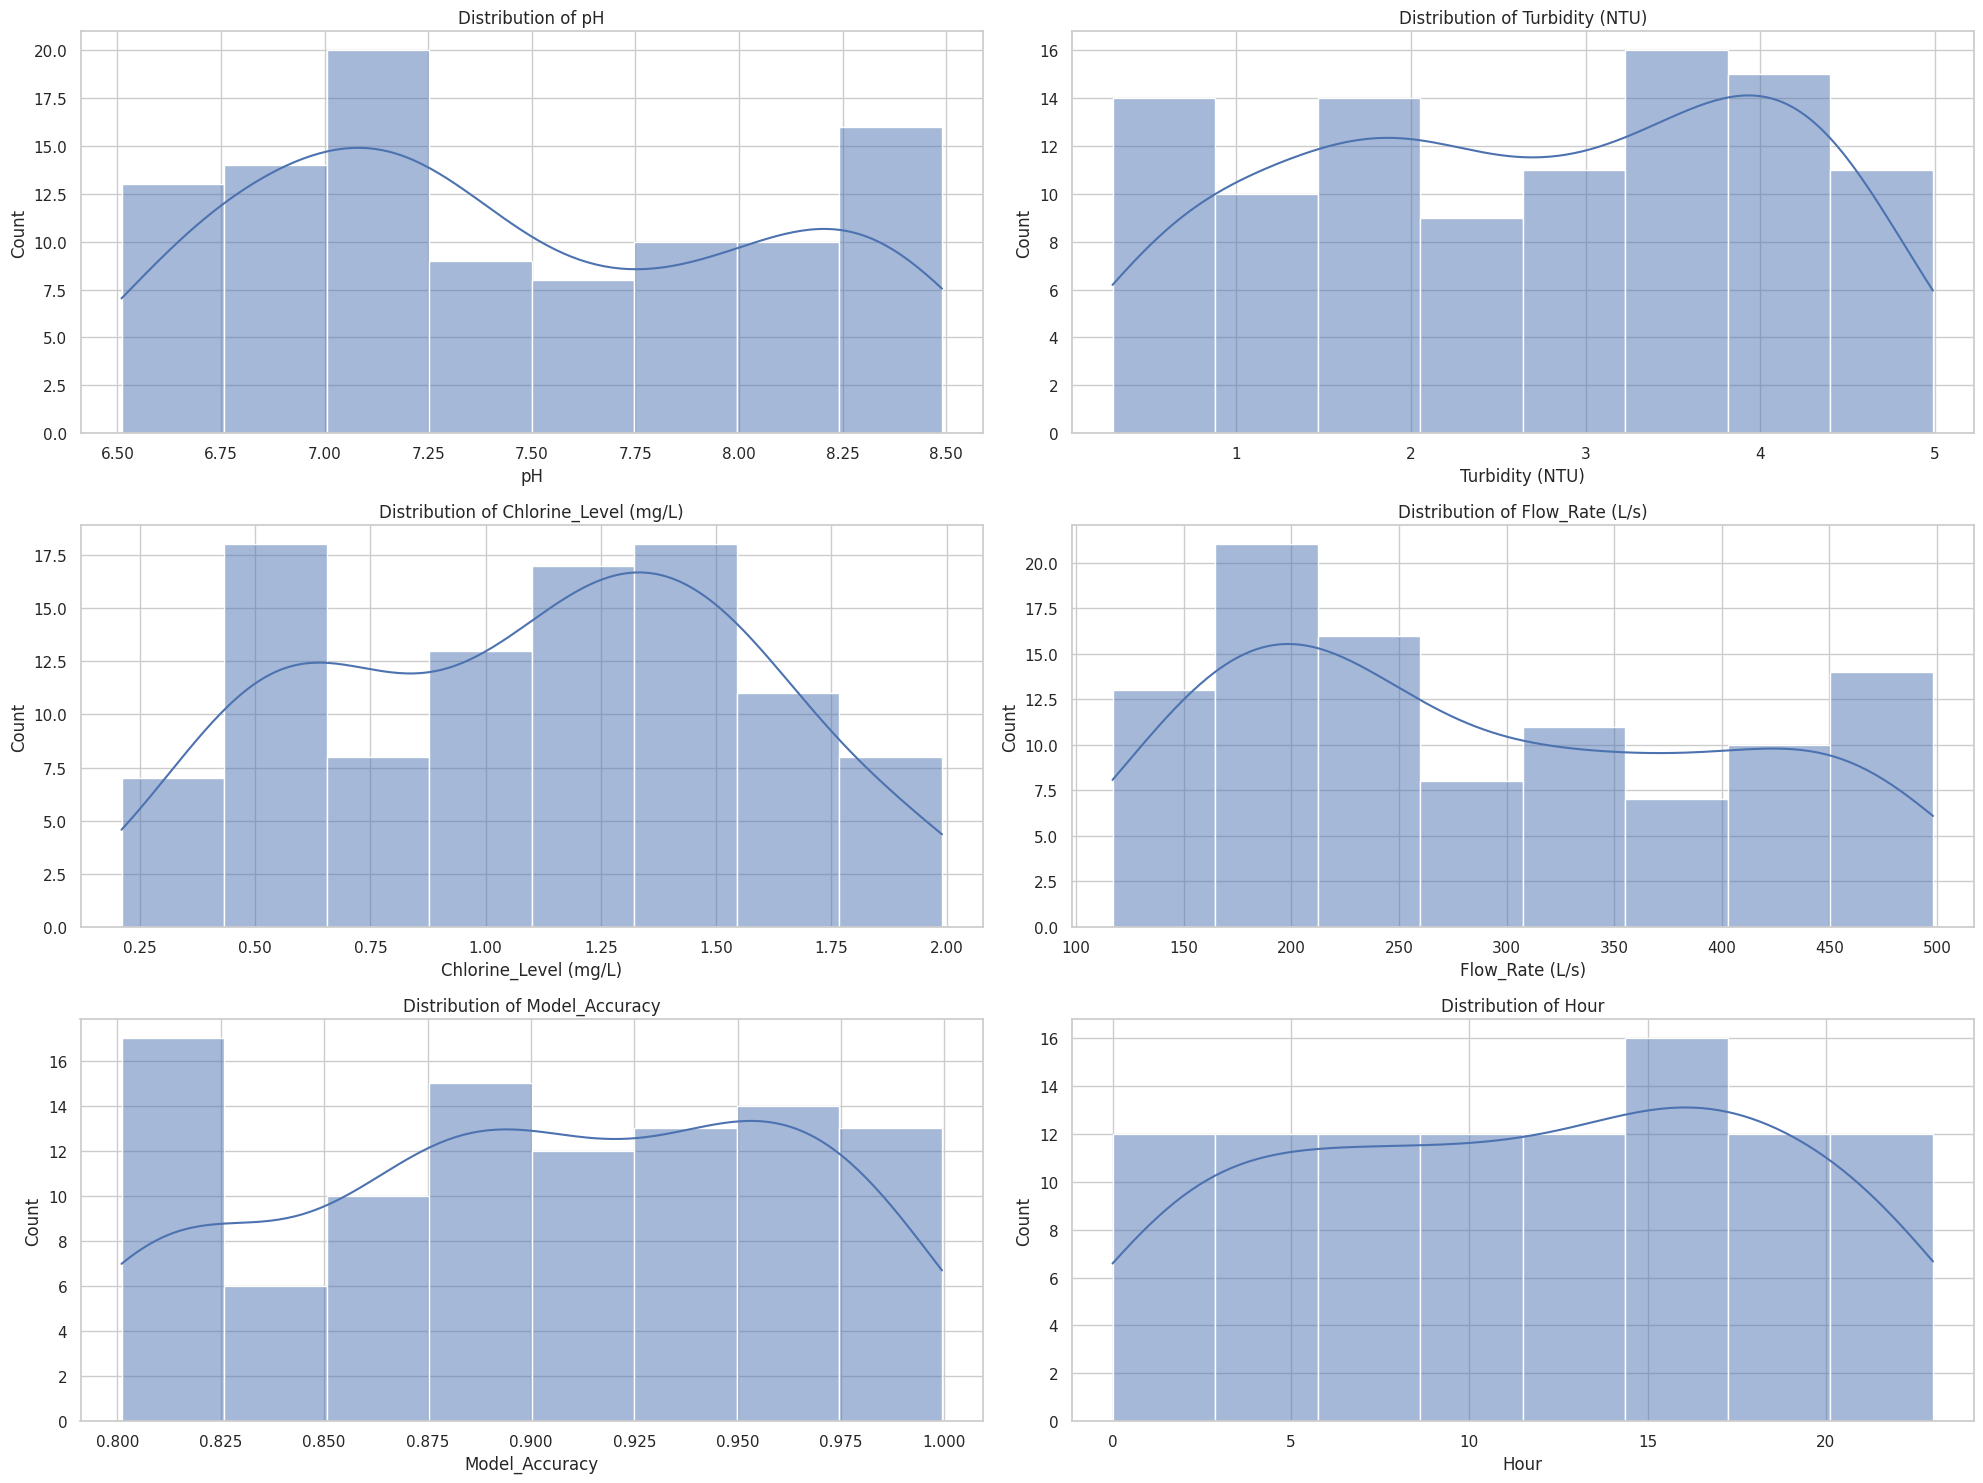

In [ ]:
numerical_cols = ['pH', 'Turbidity (NTU)', 'Chlorine_Level (mg/L)',
                 'Flow_Rate (L/s)', 'Model_Accuracy', 'Hour']


plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()
plt.close()



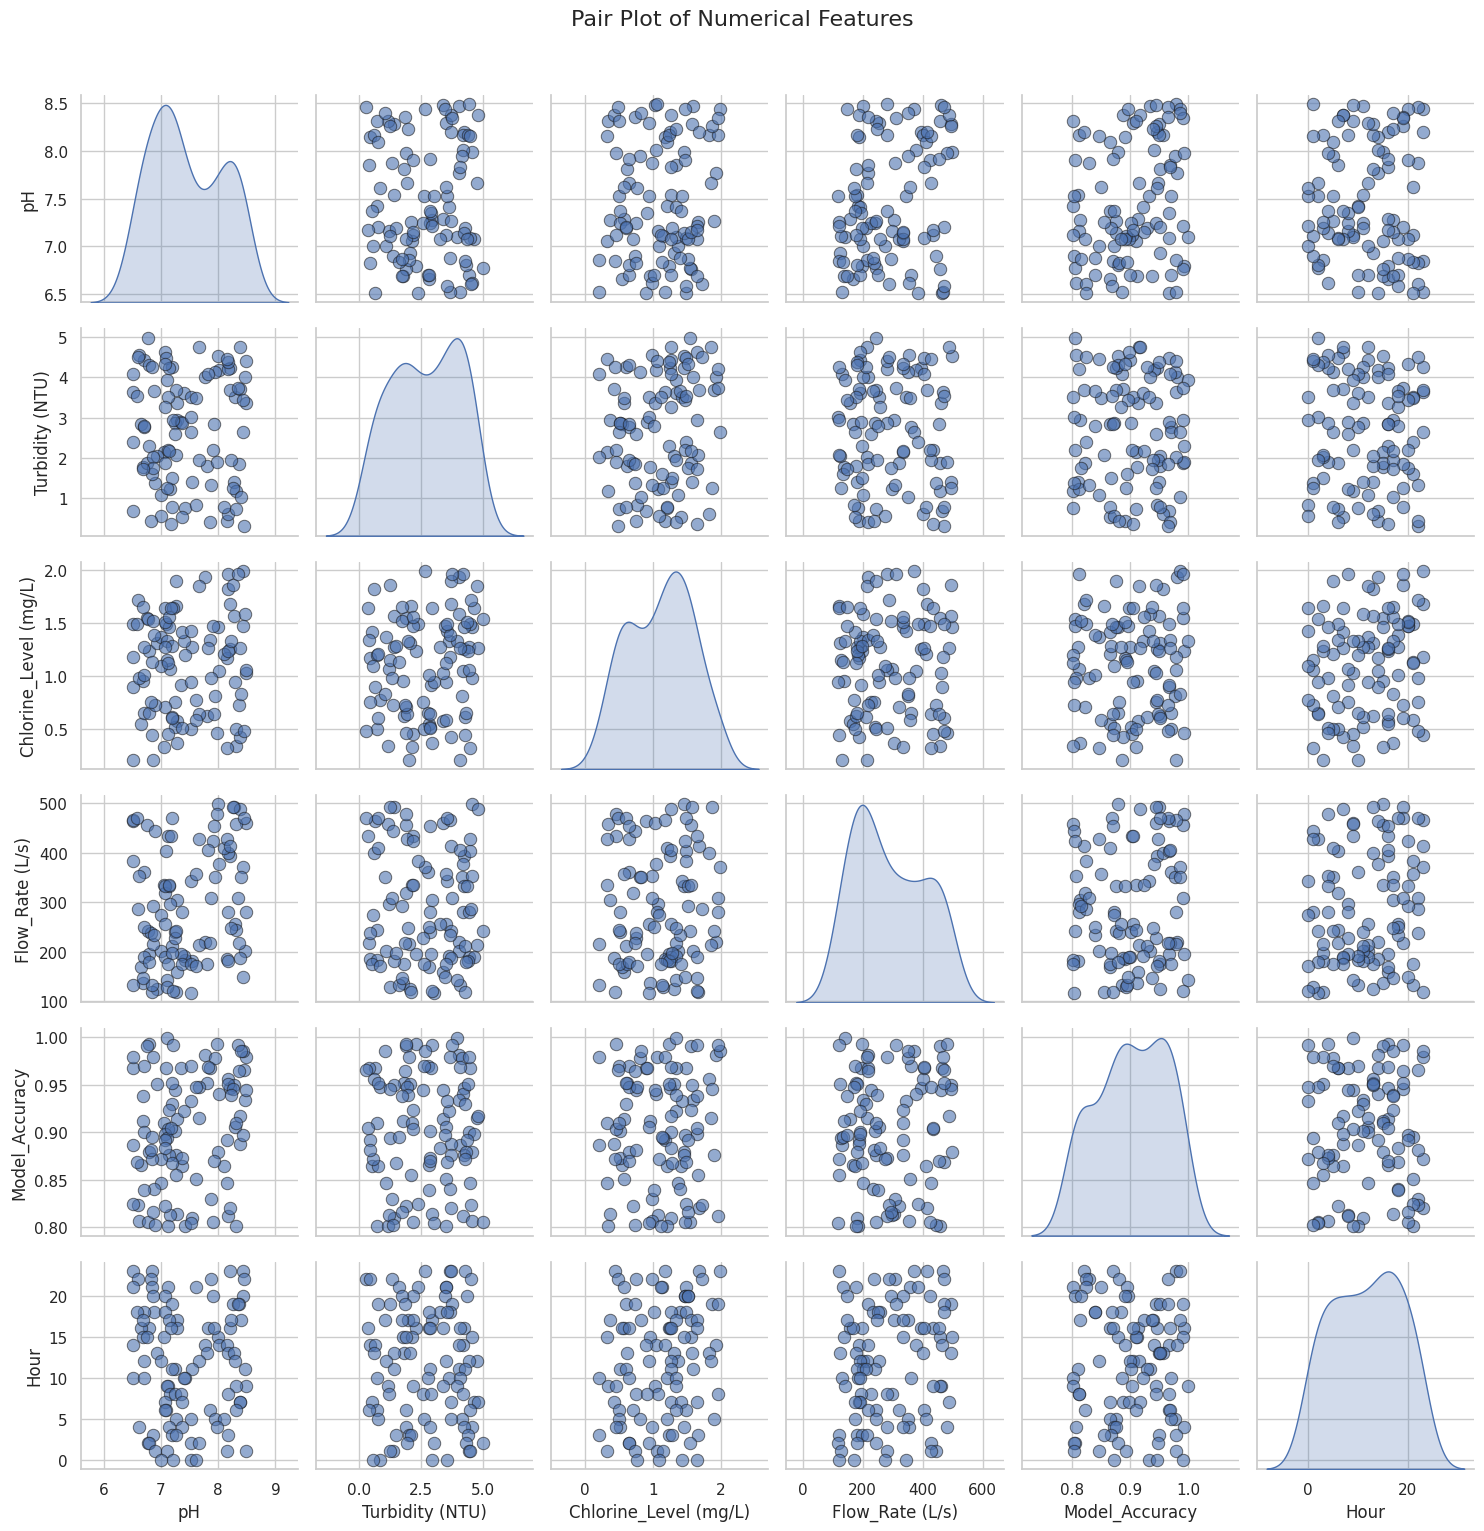

In [ ]:


# Create pair plot for numerical features
g = sns.pairplot(data[numerical_cols], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
g.fig.suptitle('Pair Plot of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.savefig('pairplot.png')
plt.show()
plt.close()

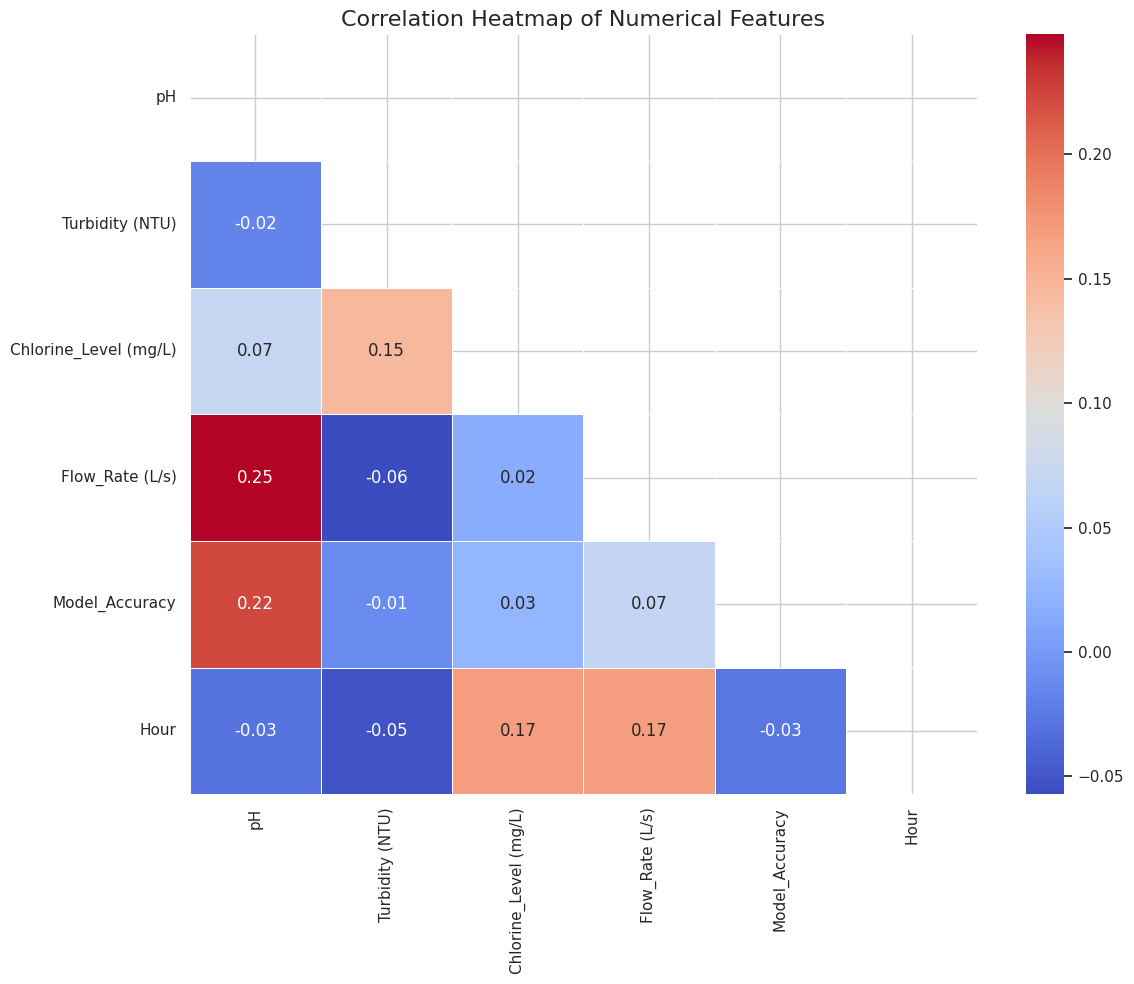

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation = data[numerical_cols].corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show();
plt.close()

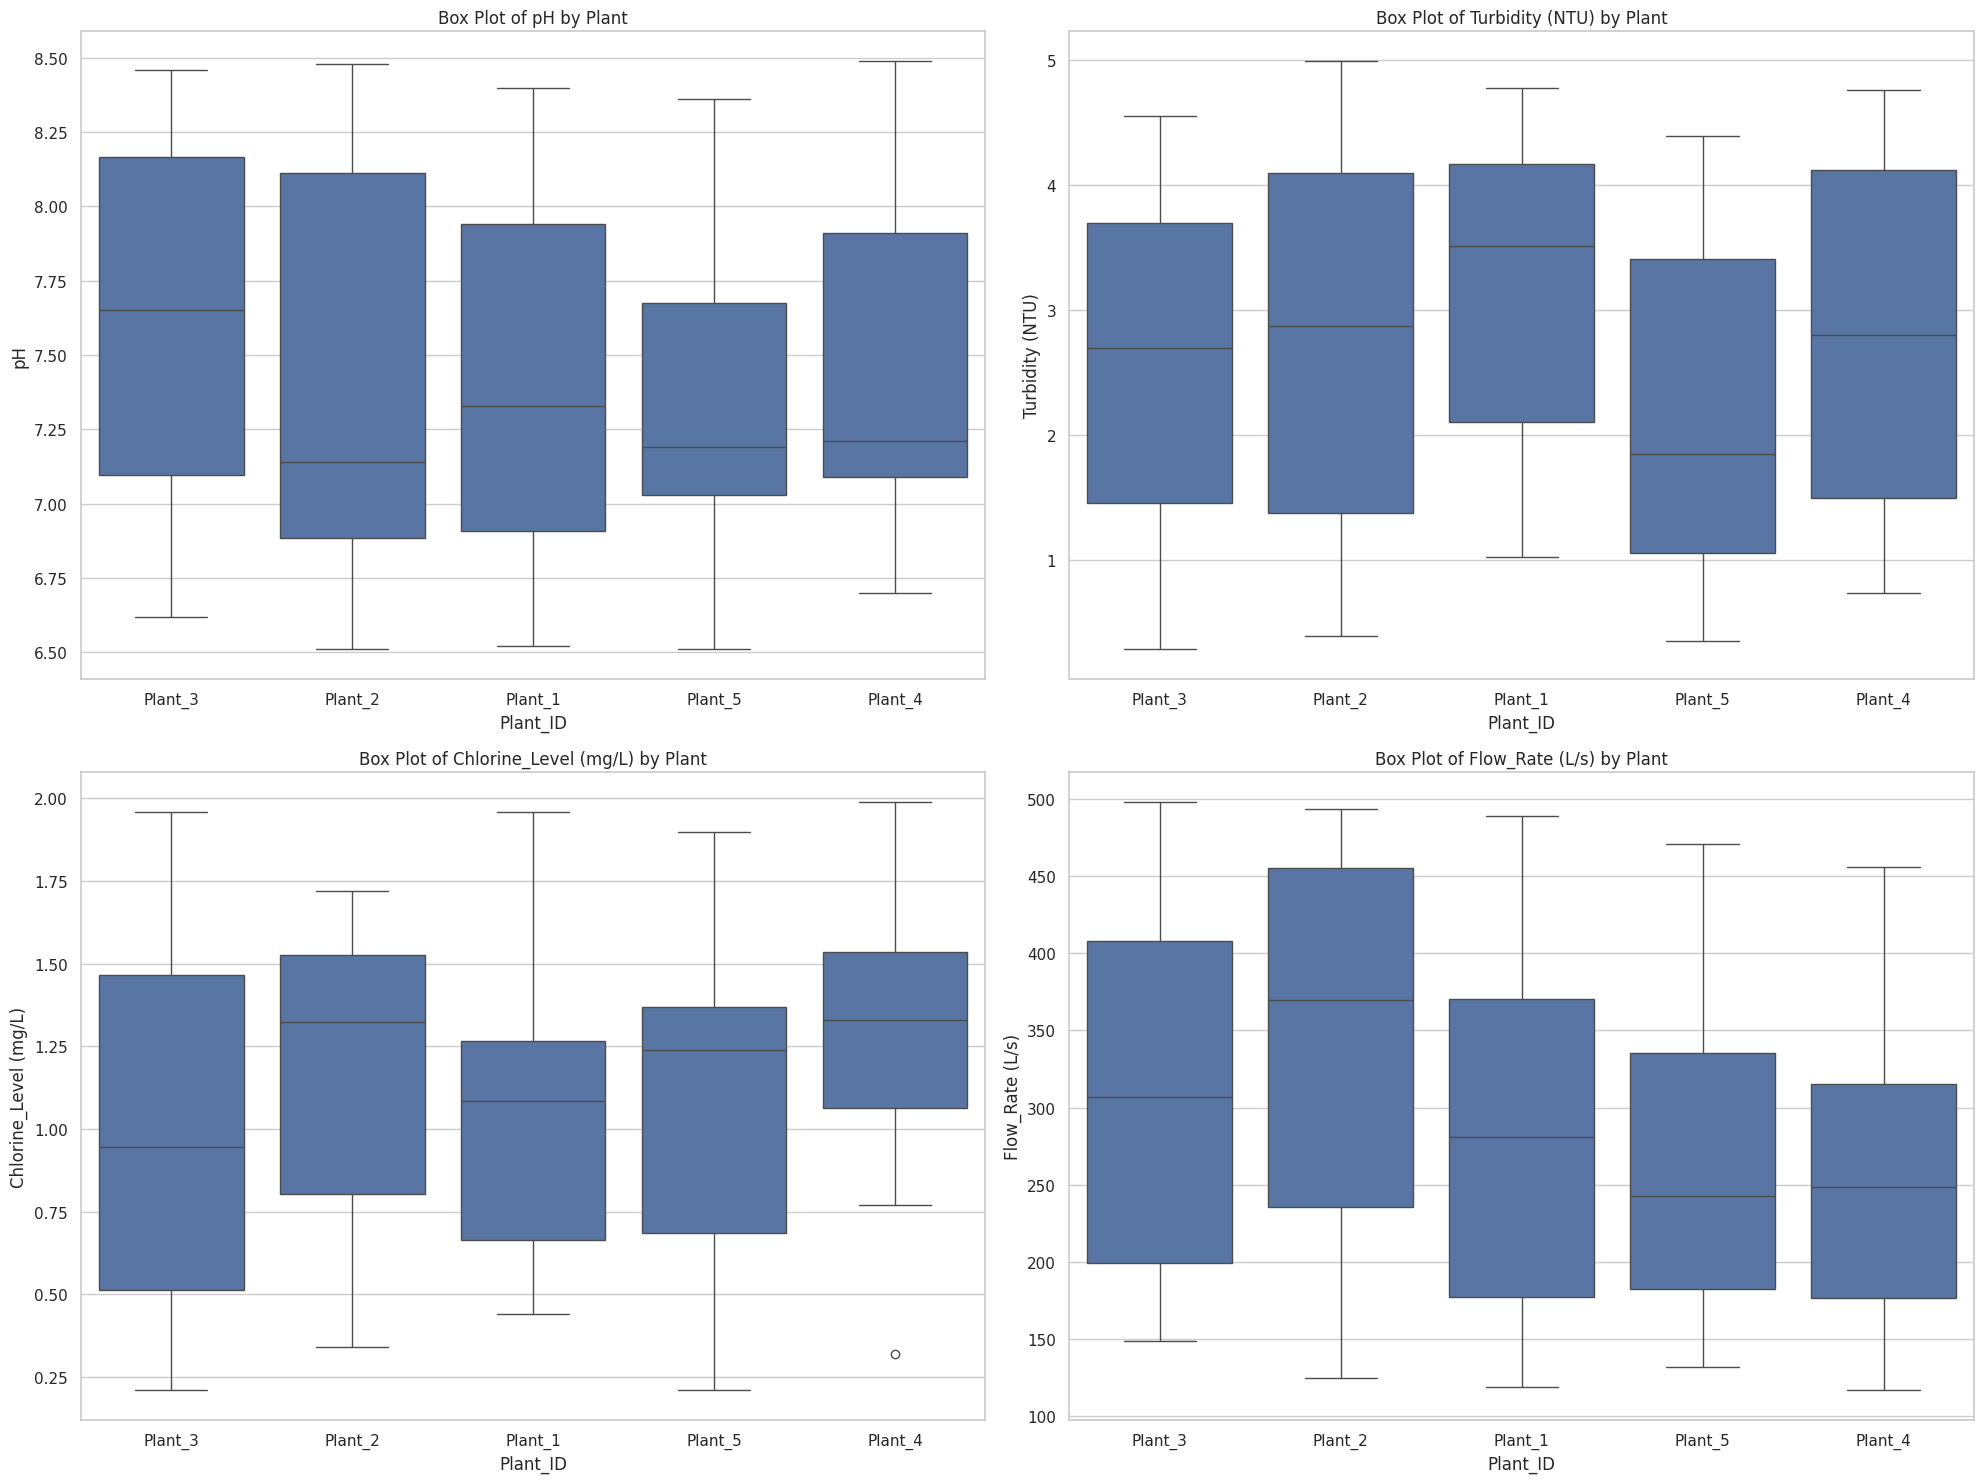

In [ ]:
# Box plots for numerical features by Plant_ID
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols[:4]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Plant_ID', y=col, data=data)
    plt.title(f'Box Plot of {col} by Plant')
    plt.tight_layout()
plt.savefig('boxplots_by_plant.png')
plt.show();
plt.close()

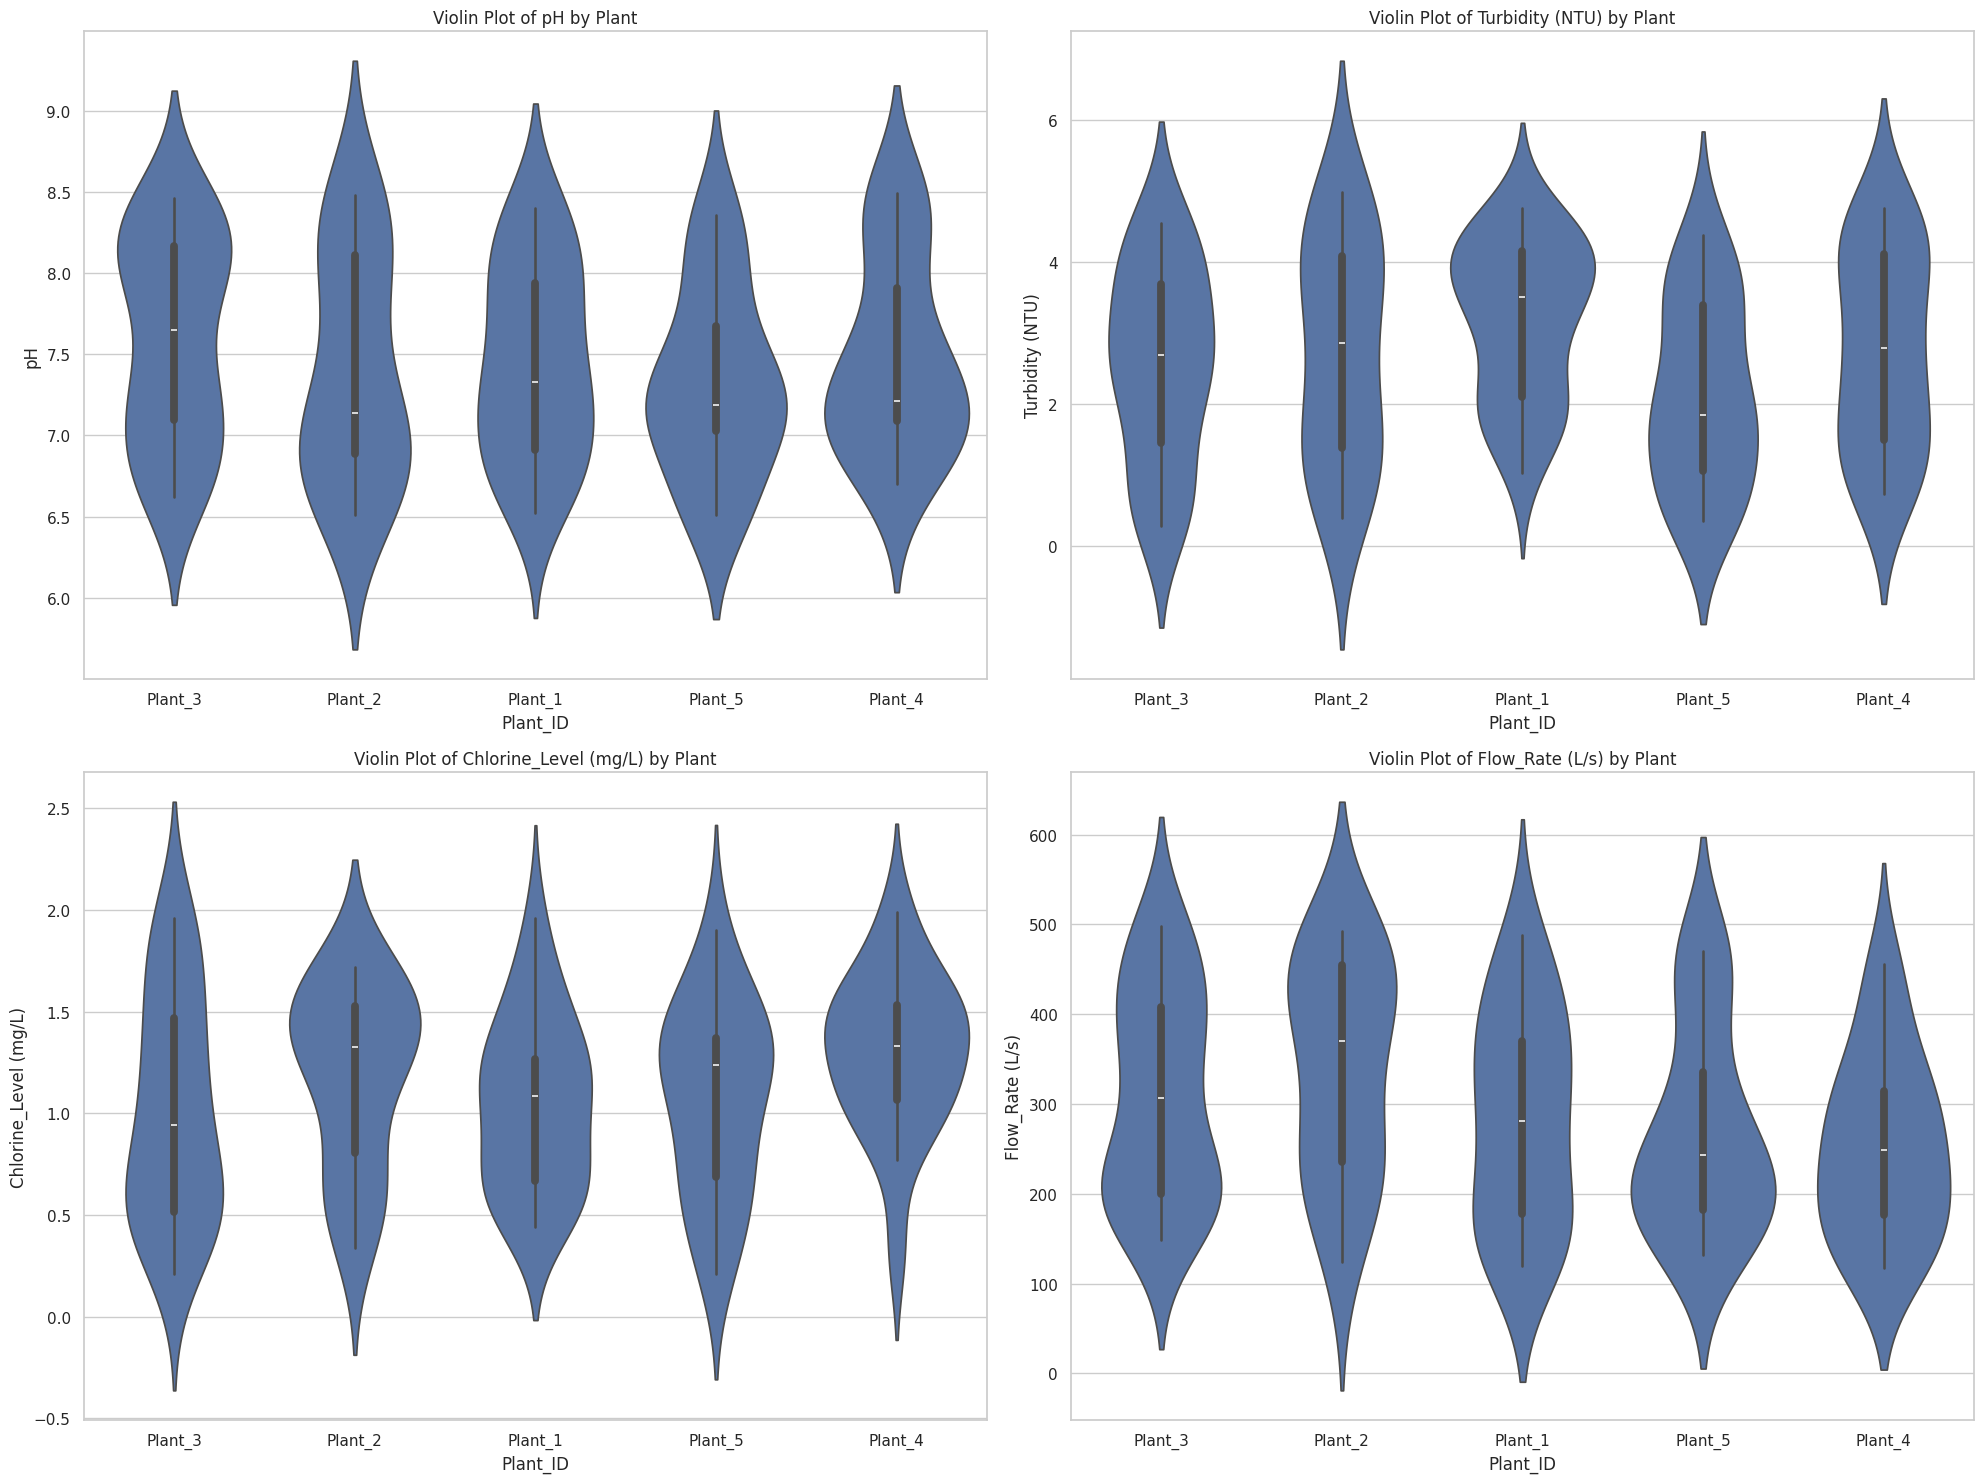

In [ ]:
# Violin plots for numerical features by Plant_ID
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols[:4]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='Plant_ID', y=col, data=data)
    plt.title(f'Violin Plot of {col} by Plant')
    plt.tight_layout()
plt.savefig('violinplots_by_plant.png')
plt.show();
plt.close()

In [ ]:
# Select features for clustering
features = ['pH', 'Turbidity (NTU)', 'Chlorine_Level (mg/L)',
           'Flow_Rate (L/s)', 'Model_Accuracy']

X = data[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

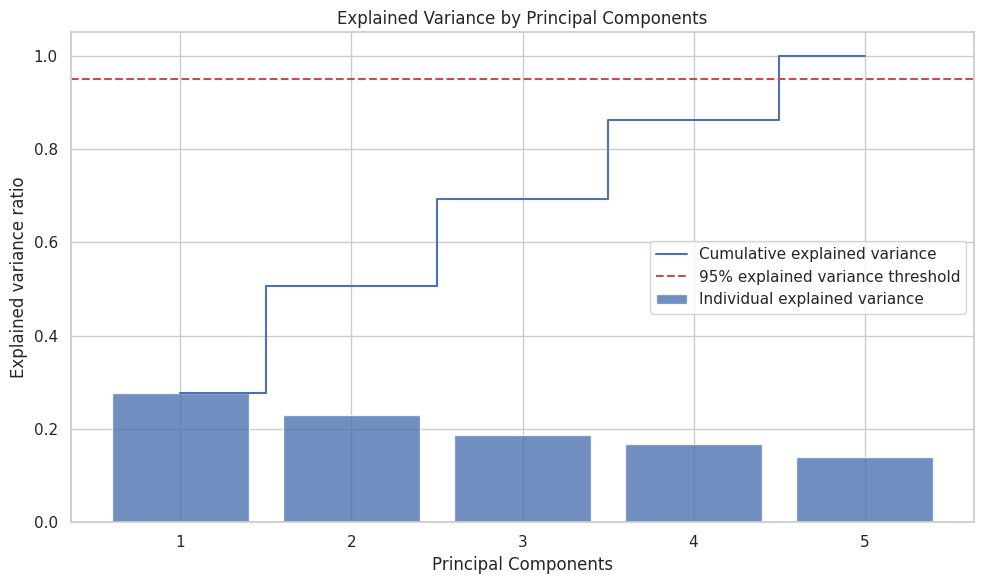

In [ ]:
# 4. Principal Component Analysis (PCA)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.8, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% explained variance threshold')
plt.xlabel('Principal Components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('pca_explained_variance.png')
plt.show()
plt.close()

In [ ]:
# Number of components for 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


if X_pca.shape[1] >= 3:
    fig = px.scatter_3d(
        data_frame=data,
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        z=X_pca[:, 2],
        color='Plant_ID',
        hover_data=['Sensor_ID', 'pH', 'Turbidity (NTU)', 'Chlorine_Level (mg/L)'],
        title='3D PCA Visualization of Water Treatment Data',
        labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3'}
    )
    fig.update_layout(legend_title_text='Plant ID')
    fig.write_html('pca_3d.html')


Number of components needed for 95% variance: 5


In [ ]:
# Find optimal number of clusters using Elbow method
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


    if n_clusters > 1:
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X_scaled, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

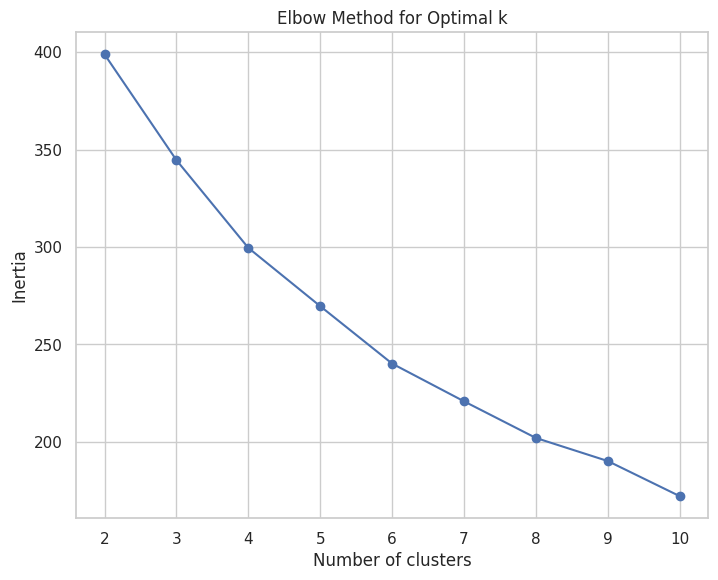

In [ ]:

# Plot Elbow method
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)


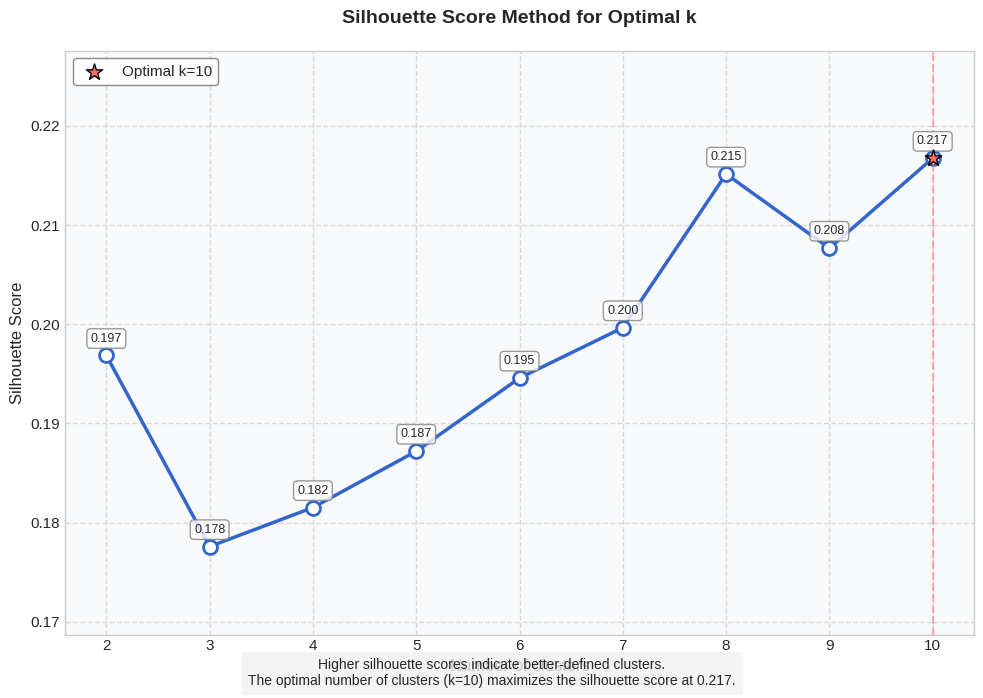

In [ ]:

# Plot Silhouette scores with enhanced styling
plt.figure(figsize=(10, 7))

plt.style.use('seaborn-v0_8-whitegrid')
ax = plt.gca()
ax.set_facecolor('#f8f9fa')


plt.plot(range_n_clusters, silhouette_scores, marker='o', markersize=10,
         linewidth=2.5, color='#3366cc', markerfacecolor='white',
         markeredgewidth=2, markeredgecolor='#3366cc')

for i, score in enumerate(silhouette_scores):
    plt.annotate(f'{score:.3f}',
                 xy=(range_n_clusters[i], score),
                 xytext=(0, 10),
                 textcoords='offset points',
                 ha='center',
                 fontsize=9,
                 bbox=dict(boxstyle='round,pad=0.3', fc='#ffffff', ec='gray', alpha=0.8))

optimal_index = np.argmax(silhouette_scores)
optimal_k = range_n_clusters[optimal_index]
plt.scatter([optimal_k], [silhouette_scores[optimal_index]], s=150, c='#ff6b6b',
            marker='*', label=f'Optimal k={optimal_k}', zorder=5, edgecolor='black')

plt.axvline(x=optimal_k, color='#ff6b6b', linestyle='--', alpha=0.5)

plt.title('Silhouette Score Method for Optimal k', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(range_n_clusters)
plt.ylim([min(silhouette_scores) * 0.95, max(silhouette_scores) * 1.05])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best', frameon=True, facecolor='white', framealpha=0.9, edgecolor='gray')


plt.figtext(0.5, 0.01,
            f"Higher silhouette scores indicate better-defined clusters.\nThe optimal number of clusters (k={optimal_k}) maximizes the silhouette score at {silhouette_scores[optimal_index]:.3f}.",
            ha='center', fontsize=10, bbox={'facecolor':'#f0f0f0', 'alpha':0.8, 'pad':5})

plt.tight_layout()
plt.savefig('silhouette_scores_enhanced.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


Optimal number of clusters based on silhouette score: 10


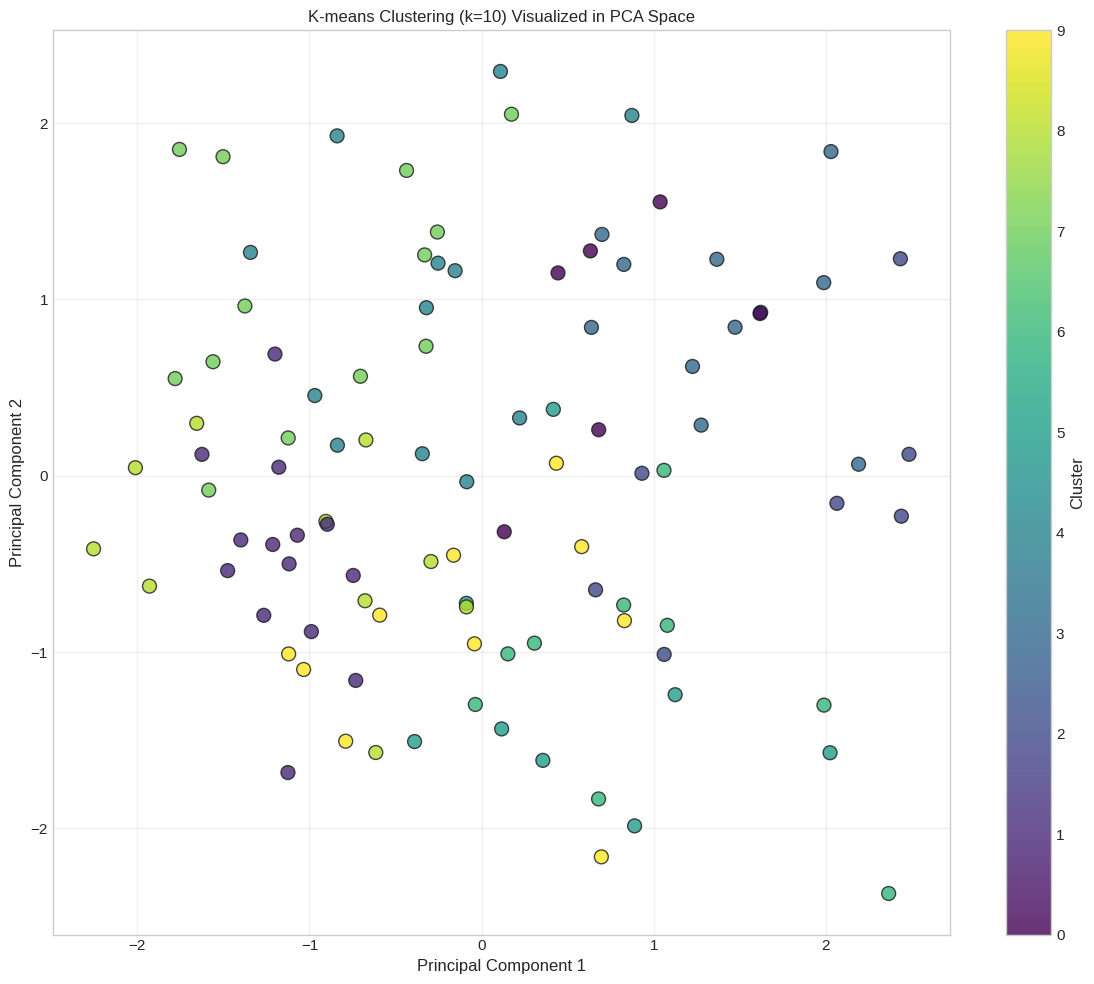

In [ ]:
# Determine optimal number of clusters
optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on silhouette score: {optimal_clusters}")

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_,
                     cmap='viridis', s=100, alpha=0.8, edgecolor='k')
plt.colorbar(scatter, label='Cluster')
plt.title(f'K-means Clustering (k={optimal_clusters}) Visualized in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('kmeans_clusters_pca.png')
plt.show()
plt.close()

In [ ]:

# Interactive K-means clusters visualization with Plotly
fig = px.scatter(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    color=kmeans.labels_,
    hover_data=[data['Plant_ID'], data['Sensor_ID'], data['pH'], data['Turbidity (NTU)'],
                data['Chlorine_Level (mg/L)'], data['Flow_Rate (L/s)']],
    title=f'K-means Clustering (k={optimal_clusters}) Visualized in PCA Space',
    labels={'x': 'PC1', 'y': 'PC2', 'color': 'Cluster'}
)
fig.update_layout(legend_title_text='Cluster')
fig.write_html('kmeans_clusters_interactive.html')

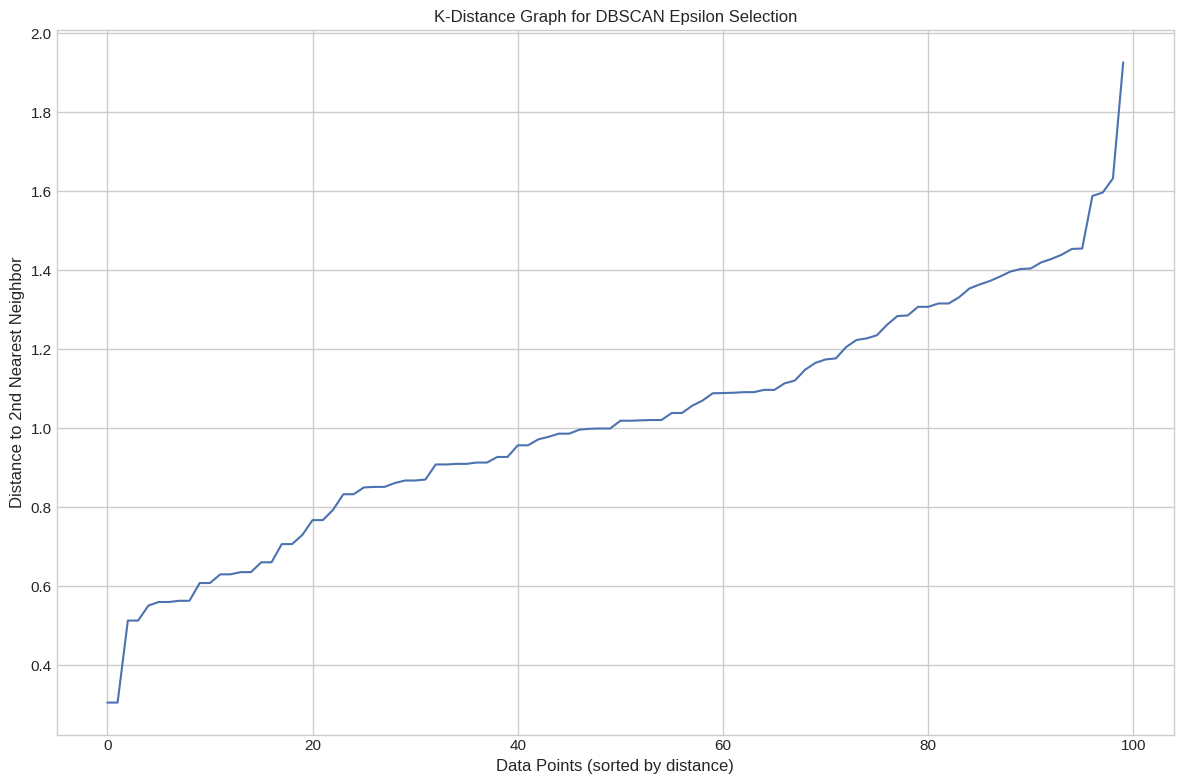

In [ ]:
# 6. DBSCAN Clustering

from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 1])

plt.figure(figsize=(12, 8))
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN Epsilon Selection')
plt.xlabel('Data Points (sorted by distance)')
plt.ylabel('Distance to 2nd Nearest Neighbor')
plt.grid(True)
plt.tight_layout()
plt.savefig('dbscan_epsilon_selection.png')
plt.show()
plt.close()


DBSCAN results:
Number of clusters: 0
Number of noise points: 100


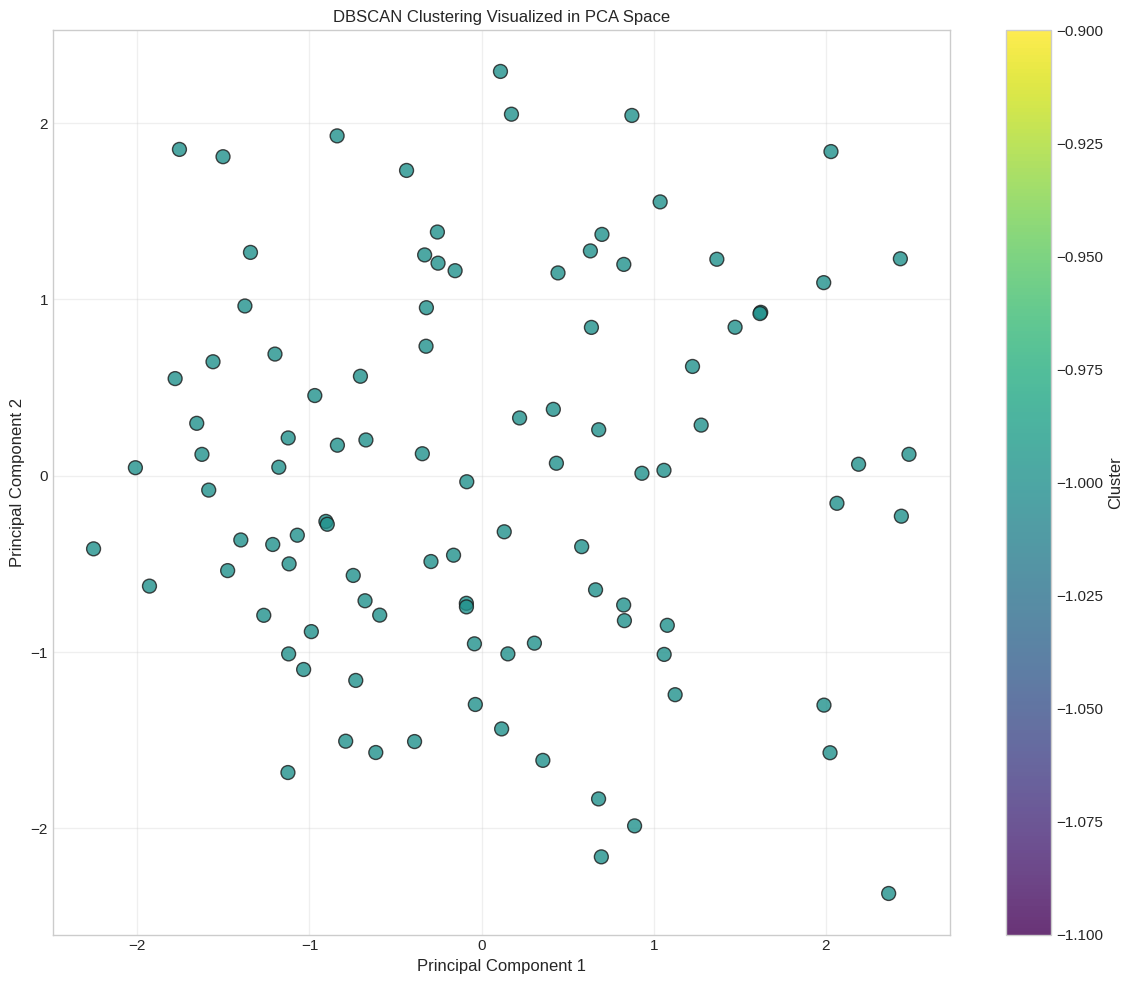

In [ ]:
epsilon = 0.5  # This should be adjusted based on the k-distance graph


dbscan = DBSCAN(eps=epsilon, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)
print(f"\nDBSCAN results:")
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan.labels_,
                     cmap='viridis', s=100, alpha=0.8, edgecolor='k')
plt.colorbar(scatter, label='Cluster')
plt.title('DBSCAN Clustering Visualized in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('dbscan_clusters_pca.png')
plt.show()
plt.close()

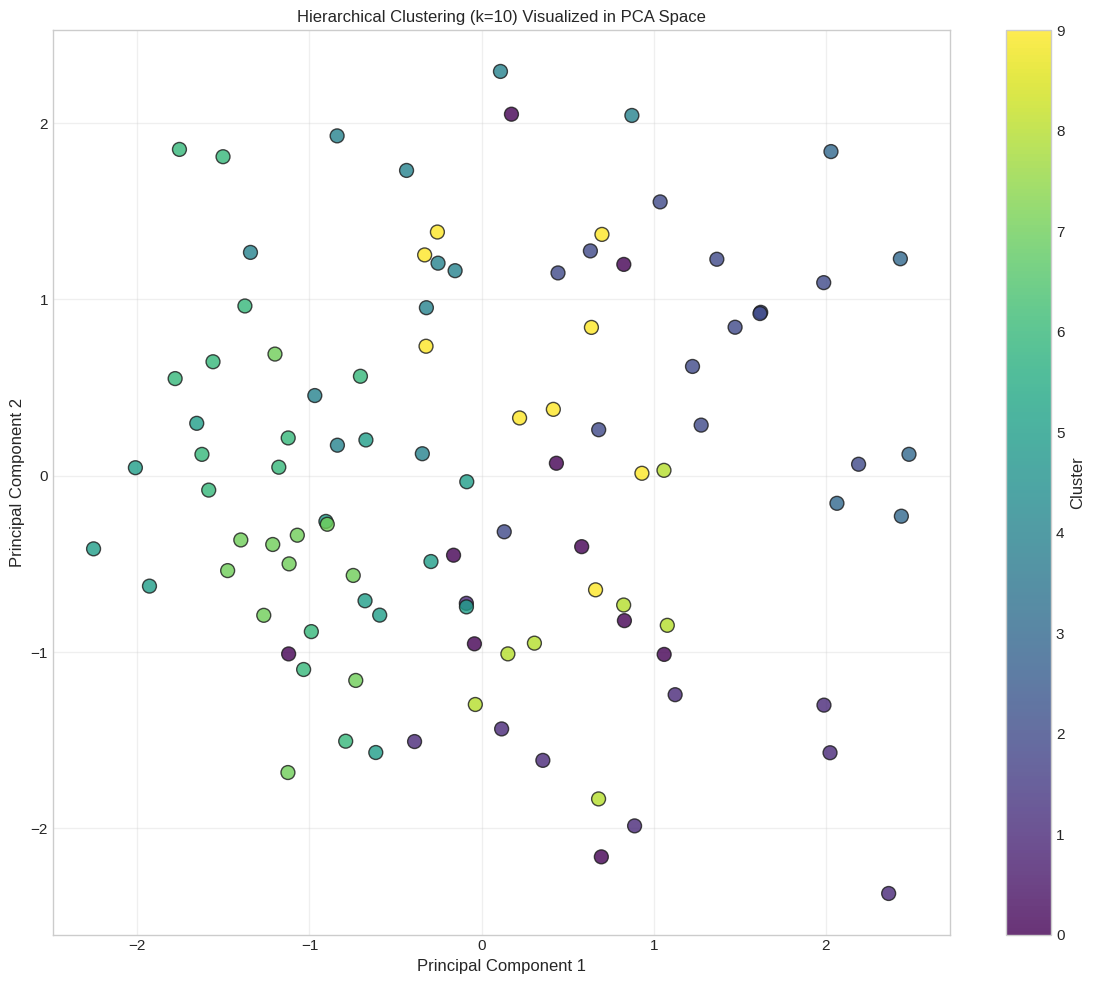

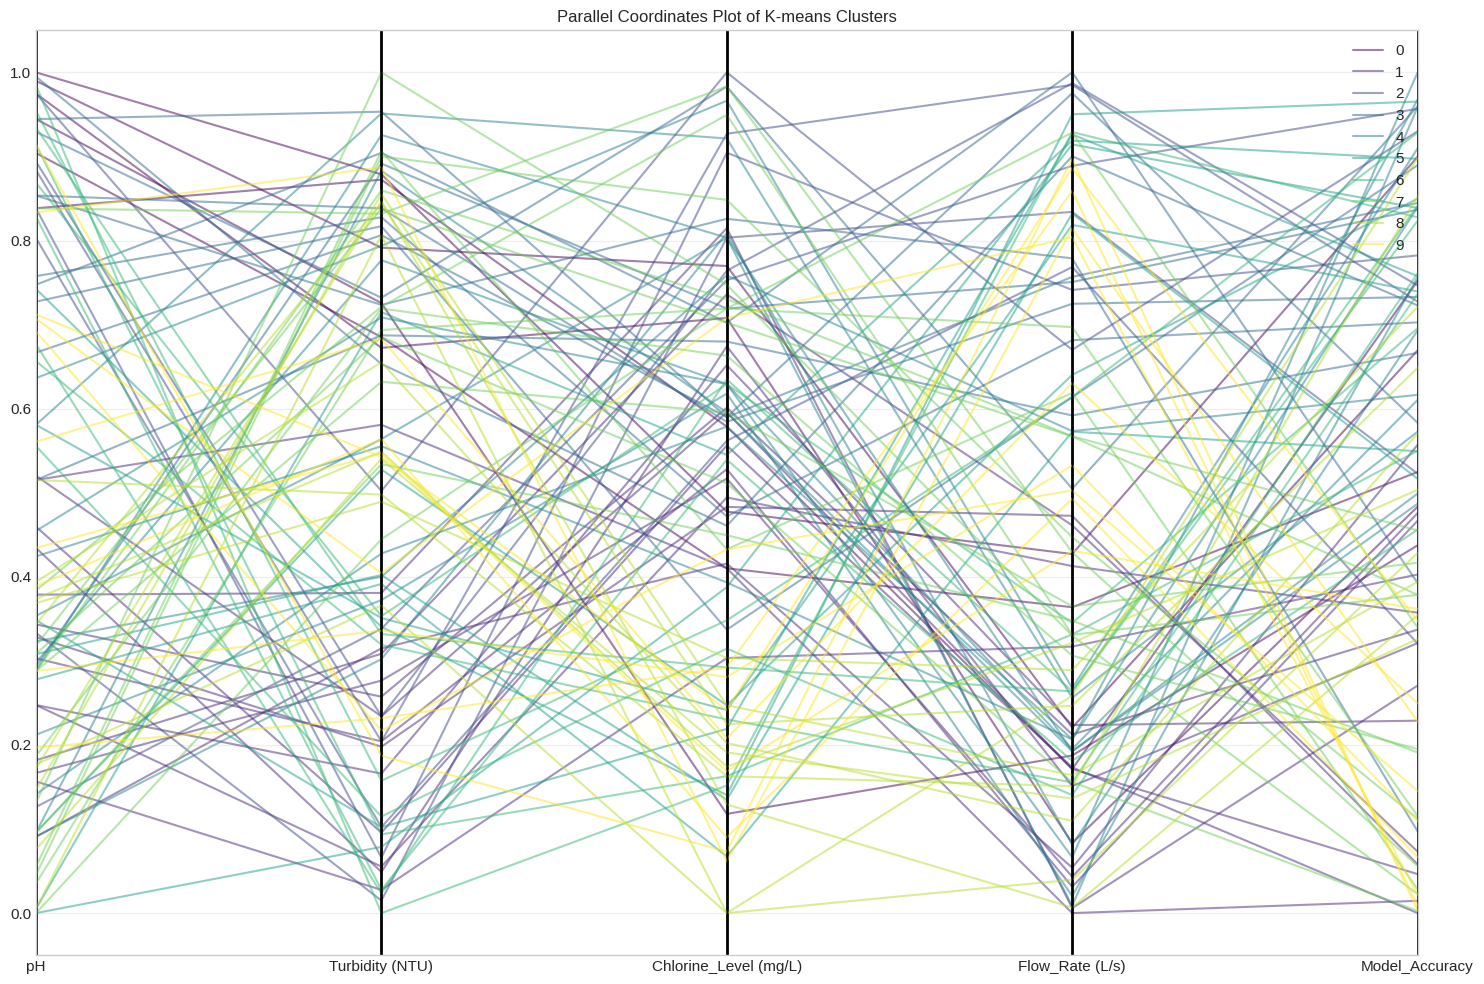

In [ ]:
# Create a parallel coordinates plot for clusters
plt.figure(figsize=(15, 10))

parallel_df = X.copy()
for col in parallel_df.columns:
    parallel_df[col] = (parallel_df[col] - parallel_df[col].min()) / (parallel_df[col].max() - parallel_df[col].min())

parallel_df['Cluster'] = kmeans.labels_

colors = plt.cm.viridis(np.linspace(0, 1, optimal_clusters))

for i in range(optimal_clusters):
    cluster_data = parallel_df[parallel_df['Cluster'] == i]
    pd.plotting.parallel_coordinates(cluster_data, 'Cluster', color=colors[i], alpha=0.5)

plt.title('Parallel Coordinates Plot of K-means Clusters')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('parallel_coordinates_clusters.png')
plt.show()
plt.close()

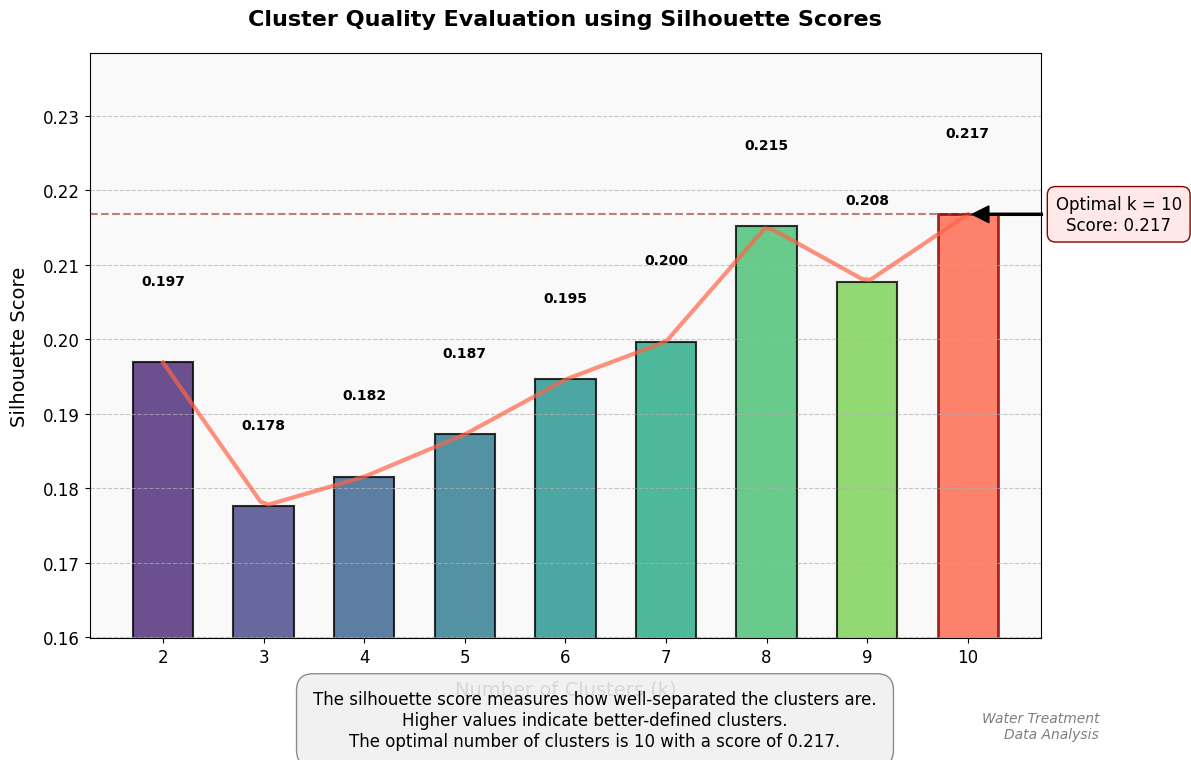

In [ ]:
# Create a completely new design for the silhouette scores plot
plt.figure(figsize=(12, 8))

plt.style.use('default')
ax = plt.gca()
ax.set_facecolor('#f9f9f9')

colors = plt.cm.viridis(np.linspace(0.1, 0.9, len(silhouette_scores)))

bars = plt.bar(range_n_clusters, silhouette_scores, color=colors,
               width=0.6, edgecolor='black', linewidth=1.5, alpha=0.8)

x_smooth = np.linspace(min(range_n_clusters), max(range_n_clusters), 100)
y_smooth = np.interp(x_smooth, range_n_clusters, silhouette_scores)
plt.plot(x_smooth, y_smooth, color='#ff6347', linewidth=3, alpha=0.7)

optimal_index = np.argmax(silhouette_scores)
optimal_k = range_n_clusters[optimal_index]
best_score = silhouette_scores[optimal_index]

bars[optimal_index].set_color('#ff6347')
bars[optimal_index].set_edgecolor('darkred')
bars[optimal_index].set_linewidth(2)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{silhouette_scores[i]:.3f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold',
             rotation=0)


plt.annotate(f'Optimal k = {optimal_k}\nScore: {best_score:.3f}',
             xy=(optimal_k, best_score),
             xytext=(optimal_k + 1.5, best_score),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.5", fc='#ffe8e8', ec="darkred"))


plt.title('Cluster Quality Evaluation using Silhouette Scores',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Clusters (k)', fontsize=14, labelpad=10)
plt.ylabel('Silhouette Score', fontsize=14, labelpad=10)
plt.xticks(range_n_clusters, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([min(silhouette_scores) * 0.9, max(silhouette_scores) * 1.1])

plt.axhline(y=best_score, color='darkred', linestyle='--', alpha=0.5)

plt.grid(axis='y', linestyle='--', alpha=0.7)


explanation = (
    f"The silhouette score measures how well-separated the clusters are.\n"
    f"Higher values indicate better-defined clusters.\n"
    f"The optimal number of clusters is {optimal_k} with a score of {best_score:.3f}."
)
plt.figtext(0.5, 0.01, explanation,
            ha='center', fontsize=12,
            bbox=dict(facecolor='#f0f0f0', edgecolor='gray', boxstyle='round,pad=1', alpha=0.9))


plt.figtext(0.92, 0.02, "Water Treatment\nData Analysis",
            ha='right', fontsize=10, fontstyle='italic', alpha=0.5)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig('silhouette_scores_enhanced_new.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()